# 1. Import Library

In [72]:
!pip install streamlit
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations on data
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization

from sklearn.preprocessing import StandardScaler  # Perform scaling
from sklearn.model_selection import train_test_split  # Split data into training and testing sets

# ML model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Measure model accuracy and display summary statistics of model performance
import streamlit as st  # Model deployment

from imblearn.over_sampling import SMOTE

import itertools

Defaulting to user installation because normal site-packages is not writeable


# 2. Analisis Data Eksploratif (EDA) & Pra-Pemrosesan Data

PIC : July, Ola, Osha, Faza

## 2.1 Membaca Dataset

In [73]:
# Mengambil dataset dari URL
url = "https://raw.githubusercontent.com/nuraulaola/ds-batch-32-final-project/main/datasets/Dataset1_Customer_Churn.csv"
df = pd.read_csv(url)

# Menampilkan lima baris pertama dari dataset untuk memahami struktur data
df.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


In [74]:
# Mendefinisikan nama variabel dependen yang merupakan target analisis
dependent_variable_name = "Exited"

## 2.2 EDA

### 2.2.1 Informasi Umum DataFrame

In [75]:
# Menampilkan informasi umum mengenai DataFrame
print("Informasi umum mengenai DataFrame:")
df.info()

Informasi umum mengenai DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


Deskripsi Data

Cerita Dataset:

- Dataset ini terdiri dari total 10.000 baris (entries) dengan rentang indeks baris dari 0 hingga 9999, dan terdapat 7 kolom.
- Variabel independen melibatkan Gender, Age, CreditScore, EstimatedSalary, dan HasCrCard, yang berisi informasi tentang pelanggan.
- Variabel dependen adalah Exited, yang menunjukkan apakah pelanggan tersebut telah meninggalkan layanan.
- CustomerId merupakan data integer

Fitur:

- CustomerId: ID unik untuk setiap pelanggan.
- Gender: Jenis kelamin pelanggan (Female / Male).
- Age: Usia pelanggan.
- CreditScore: Skor kredit pelanggan.
- EstimatedSalary: Perkiraan gaji pelanggan.
- HasCrCard: Menunjukkan apakah pelanggan memiliki kartu kredit (1 untuk ya, 0 untuk tidak).
- Exited: Variabel target yang menunjukkan apakah pelanggan telah keluar dari layanan (1 untuk ya, 0 untuk tidak).

### 2.2.2 Analisis Missing Values dan Jumlah Nilai Unik di Setiap Kolom

In [76]:
# Memeriksa missing values
missing_values = df.isnull().sum()

# Menampilkan jumlah missing values
print("Jumlah missing values:")
print(missing_values)

# Menampilkan jumlah nilai unik dari setiap variabel dalam dataframe
def show_unique_count_variables(df):
    # Menghitung jumlah nilai unik
    unique_counts = df.nunique()

    # Menampilkan jumlah nilai unik
    print("\nJumlah nilai unik:")
    print(unique_counts)

# Menggunakan fungsi untuk menampilkan jumlah nilai unik
show_unique_count_variables(df)

Jumlah missing values:
CustomerId         0
Gender             0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Exited             0
dtype: int64

Jumlah nilai unik:
CustomerId         10000
Gender                 2
Age                   70
CreditScore          460
EstimatedSalary     9999
HasCrCard              2
Exited                 2
dtype: int64


### 2.2.3 Analisis Nilai-Nilai Yang Duplikat

In [77]:
# Memeriksa nilai-nilai yang duplikat
duplicate_rows = df[df.duplicated()]

# Menampilkan baris yang merupakan duplikat
print("Duplikat dalam DataFrame:")
print(duplicate_rows)

Duplikat dalam DataFrame:
Empty DataFrame
Columns: [CustomerId, Gender, Age, CreditScore, EstimatedSalary, HasCrCard, Exited]
Index: []


### 2.2.4 Overview Tipe Data dari Setiap Kolom

In [78]:
# Memeriksa tipe data dari setiap kolom
column_data_types = df.dtypes

# Menampilkan tipe data dari setiap kolom
print("Tipe data dari setiap kolom:")
print(column_data_types)

Tipe data dari setiap kolom:
CustomerId           int64
Gender              object
Age                  int64
CreditScore          int64
EstimatedSalary    float64
HasCrCard            int64
Exited               int64
dtype: object


### 2.2.5 Rangkuman Statistik Deskriptif

In [79]:
# Menampilkan statistik deskriptif singkat
print("Statistik deskriptif dari kolom numerik DataFrame:")
df.describe()

Statistik deskriptif dari kolom numerik DataFrame:


,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000


### 2.2.6 Plot Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen

Distribusi variabel dependen terhadap beberapa variabel independen:
Exited 0 count: 7963
Exited 1 count: 2037


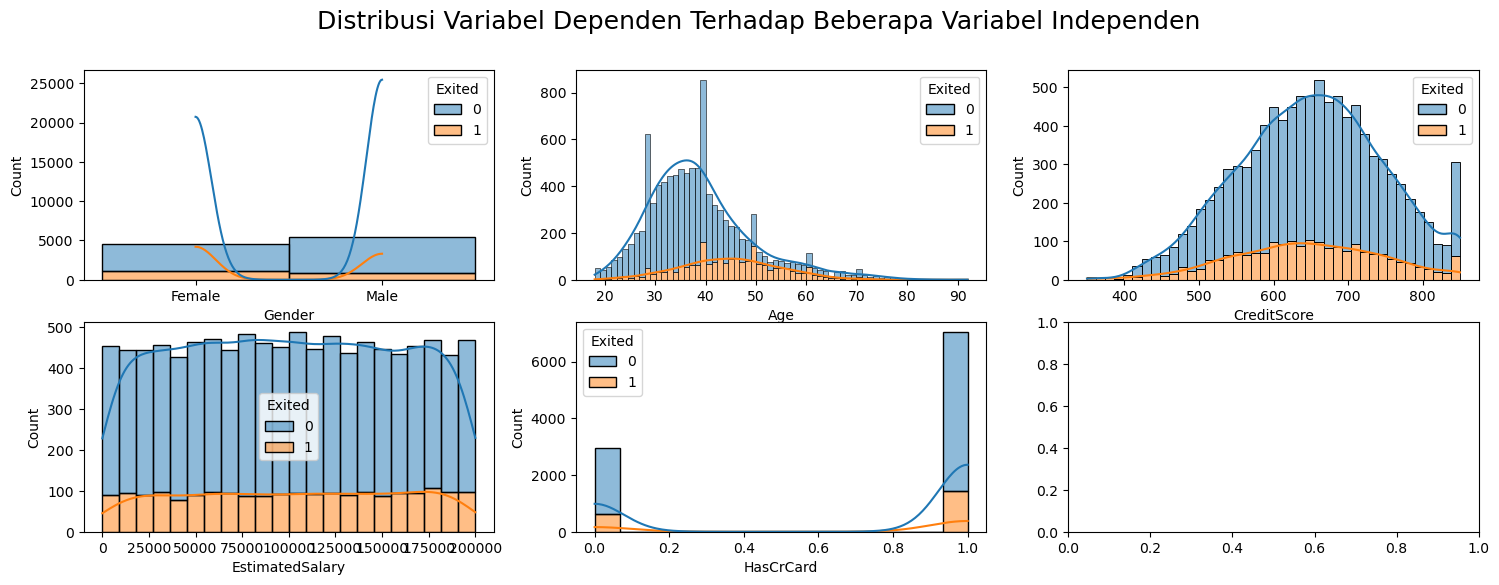

In [80]:
# Menampilkan distribusi variabel dependen terhadap beberapa variabel independen
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender'
sns.histplot(x='Gender', hue='Exited', data=df, ax=axarr[0, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Age'
sns.histplot(x='Age', hue='Exited', data=df, ax=axarr[0, 1], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore'
sns.histplot(x='CreditScore', hue='Exited', data=df, ax=axarr[0, 2], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary'
sns.histplot(x='EstimatedSalary', hue='Exited', data=df, ax=axarr[1, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard'
sns.histplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1, 1], multiple='stack', kde=True)

# Menghitung jumlah nilai 0 (tidak Exited) dan nilai 1 (Exited) pada variabel dependen 'Exited'
zero_count, one_count = df['Exited'].value_counts()
print("Distribusi variabel dependen terhadap beberapa variabel independen:")
print("Exited 0 count:", zero_count)
print("Exited 1 count:", one_count)

fig.suptitle('Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen', fontsize=18)

# Save the plot as a PNG image
plt.savefig("output1.png")

# Menampilkan plot
plt.show()

1. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender':**
- Female memiliki jumlah yang lebih tinggi pada kategori '1' (Exited), yang sesuai dengan rendahnya nilai KDE pada kategori tertentu.
- Male memiliki jumlah yang lebih tinggi pada kategori '0' (Not Exited), yang sesuai dengan tingginya nilai KDE pada kategori tertentu.

2. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'Age':**
- Mayoritas pelanggan berada dalam kelompok usia 30 - 40 dan 40 - 50.
- Kelompok usia 70 - 80 dan 80 - 90 memiliki jumlah pelanggan yang lebih sedikit.

3. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore':**
- Bentuk distribusi normal menunjukkan bahwa sebagian besar nasabah memiliki CreditScore yang berpusat di sekitar mean.
- Namun, lonjakan di atas sumbu x pada nilai 800 mengindikasikan adanya kelompok kecil tetapi signifikan dari nasabah dengan CreditScore sangat tinggi.

4. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary':**
- Distribusi seragam EstimatedSalary menunjukkan bahwa estimasi pendapatan nasabah cenderung stabil dan tidak mengalami variasi yang signifikan.
- Meskipun demikian, tidak ada pola khusus atau tren yang terlihat dalam hubungannya dengan tingkat churn. Hal ini mengindikasikan bahwa faktor-faktor lain di luar estimasi pendapatan mungkin lebih berperan dalam keputusan nasabah untuk bertahan atau keluar.

5. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard':**
- Terdapat perbedaan yang signifikan antara pemegang kartu kredit (HasCrCard=1) dan bukan pemegang kartu kredit (HasCrCard=0) dalam hal jumlah Exited.
- Pemegang kartu kredit (HasCrCard=1) memiliki jumlah Exited yang lebih tinggi dibandingkan dengan yang bukan pemegang kartu kredit.

### 2.2.7 Plot Distribusi Variabel Numerik

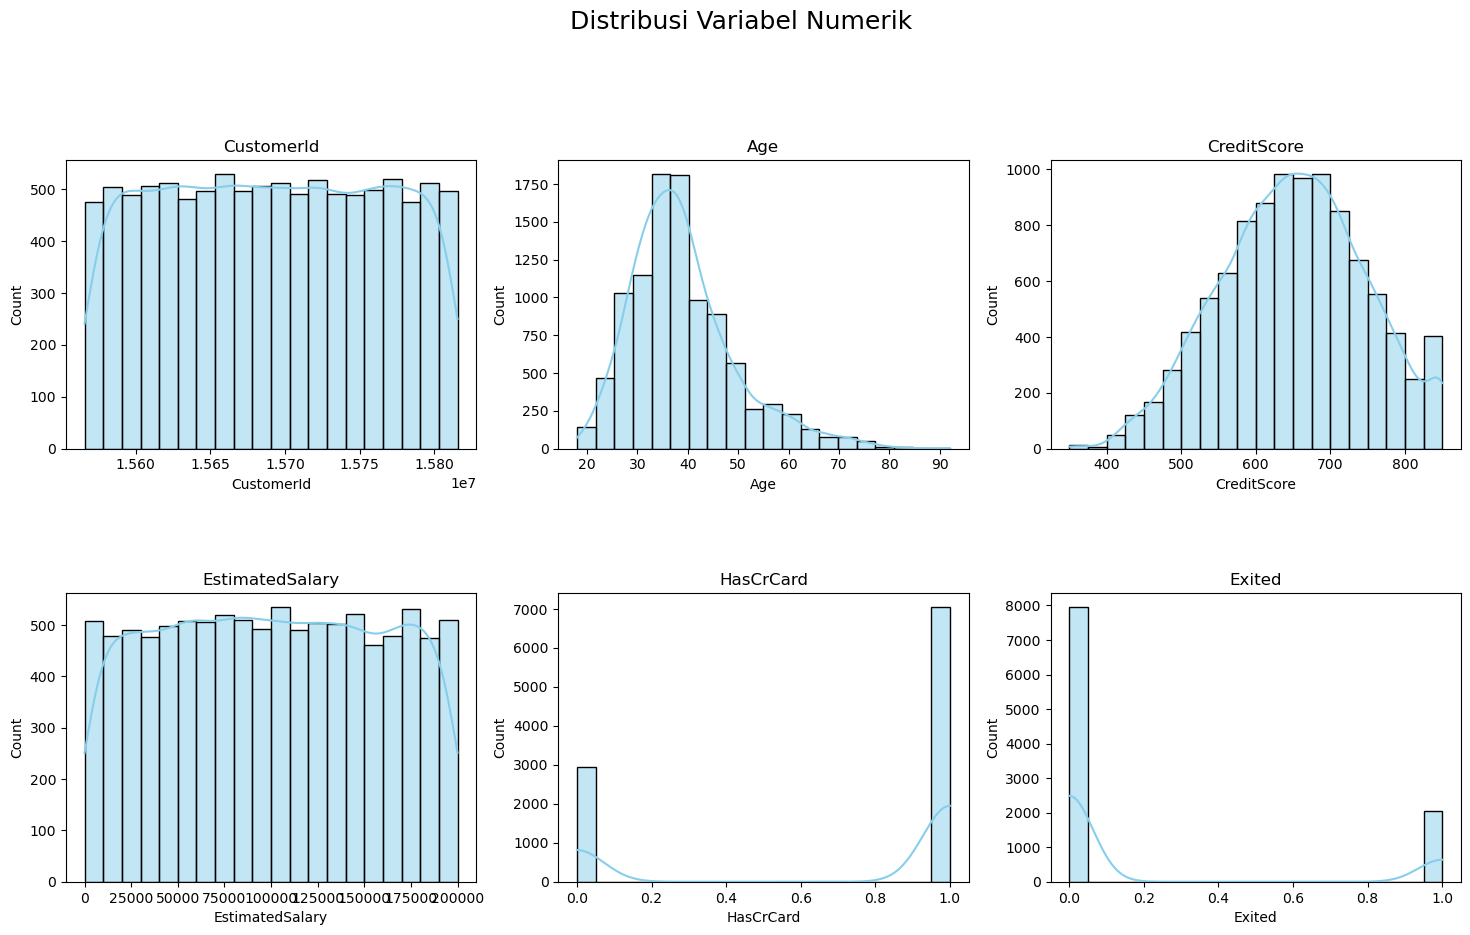

In [81]:
# Menampilkan distribusi variabel numerik dalam DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_cols = df.select_dtypes(include=numerics)
columns = df_num_cols.columns[: len(df_num_cols.columns)]

fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)

fig.suptitle('Distribusi Variabel Numerik', fontsize=18)
plt.show()

1. **Distribusi Variabel "CustomerId":**
- Variabel "CustomerId" masih muncul di plot variabel numerik karena tipe datanya masih numerik, di step selanjutnya akan diubah menjadi tipe data object.

2. **Distribusi Variabel "Age":**
- Distribusi variabel "Age" menunjukkan adanya puncak di sebelah kiri dan landai ke kanan (skewed right).
- Rentang usia dari '30-50' memiliki jumlah frekuensi "Exited" yang lebih tinggi dibandingkan dengan '20-30', tetapi menurun untuk '50++'.

3. **Distribusi Variabel "CreditScore":**
- Distribusi variabel "CreditScore" memiliki bentuk yang mirip dengan distribusi normal, tetapi terdapat peningkatan yang tiba-tiba melonjak di atas nilai 800.

4. **Distribusi Variabel "EstimatedSalary":**
- Distribusi variabel "EstimatedSalary" cenderung seragam, dengan jumlah frekuensi yang relatif stabil di setiap bin edge.

5. **Distribusi Variabel "HasCrCard":**
- Distribusi variabel "HasCrCard" menunjukkan bahwa pemegang kartu kredit (HasCrCard=1) memiliki jumlah frekuensi "Exited" yang lebih tinggi dibandingkan dengan yang bukan pemegang kartu kredit (HasCrCard=0).

6. **Distribusi Variabel "Exited":**
- Distribusi variabel "Exited" menunjukkan bahwa mayoritas data memiliki label 0 (Not Exited) dengan frekuensi yang tinggi, sementara jumlah frekuensi label 1 (Exited) hanya muncul di akhir (nilai 1.00).

### 2.2.8 Plot Distribusi Variabel Numerik (Spesifik Nasabah yang Churn)

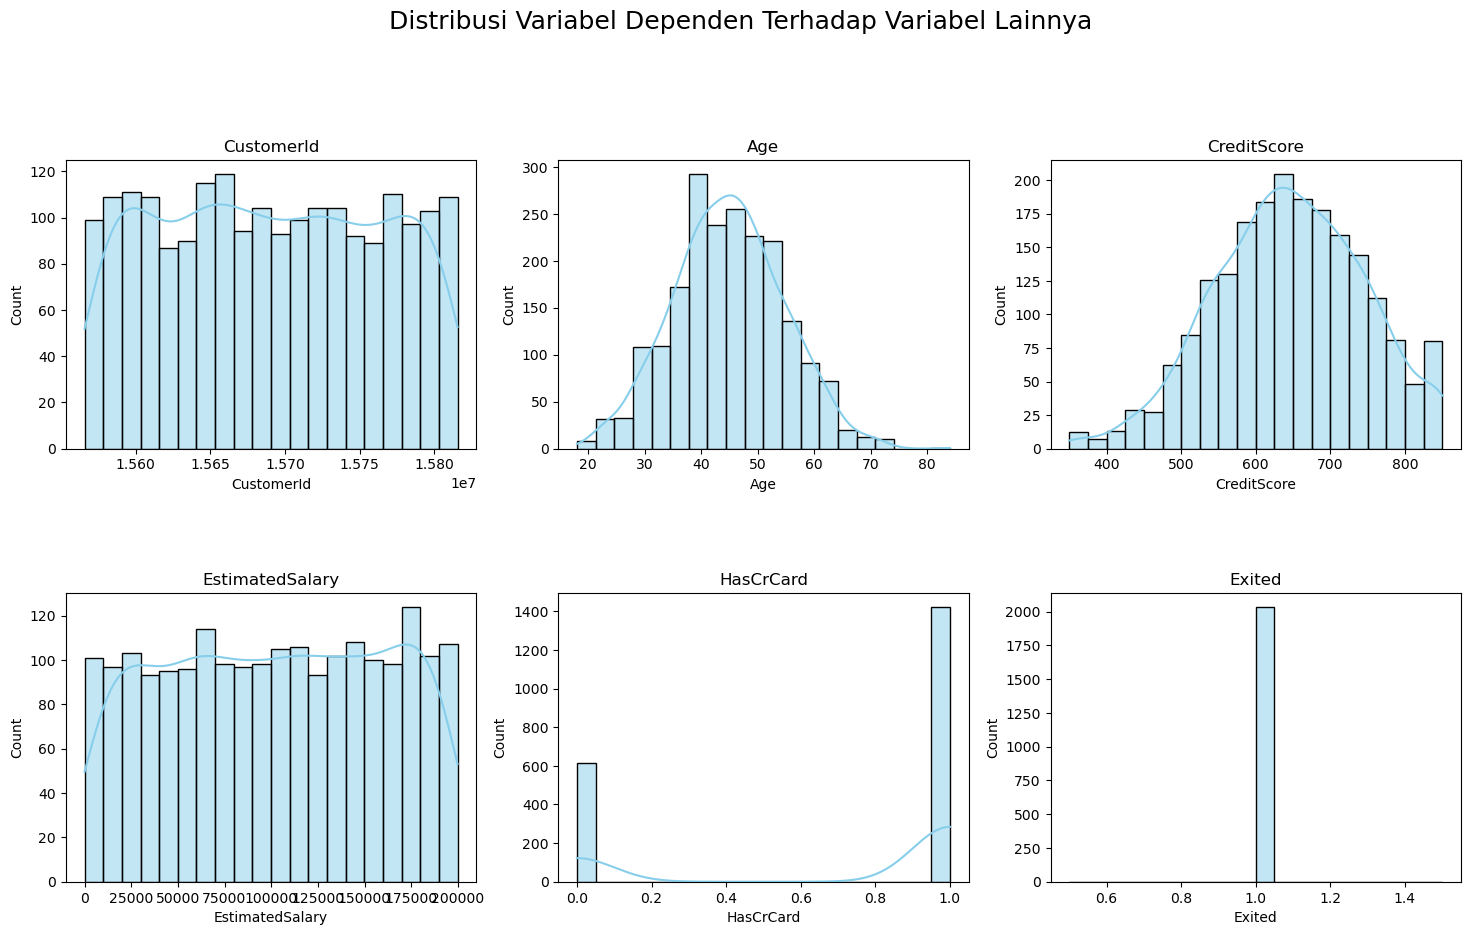

In [82]:
# Menampilkan distribusi variabel dependen terhadap variabel lainnya
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_dependent_var = df[df['Exited']==1]
df_num_cols = df_dependent_var.select_dtypes(include=numerics)
columns = df_num_cols.columns[:len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)
fig.suptitle('Distribusi Variabel Dependen Terhadap Variabel Lainnya', fontsize=18)
plt.show()

1. **Variabel "CustomerId":**
- Variabel "CustomerId" masih muncul di plot variabel numerik karena tipe datanya masih numerik, di step selanjutnya akan diubah menjadi tipe data object.

2. **Variabel "Age":**
- Distribusi variabel "Age" menunjukkan bentuk plot yang normal dengan sedikit right-skewed.
- Mayoritas data berada dalam rentang usia '36-50'.

3. **Variabel "CreditScore":**
- Distribusi variabel "CreditScore" memiliki bentuk plot yang normal, namun sedikit left-skewed.

4. **Variabel "EstimatedSalary":**
- Distribusi variabel "EstimatedSalary" menunjukkan bentuk plot yang seragam, dengan frekuensi yang relatif stabil di setiap bin edge.

5. **Variabel "HasCrCard":**
- Distribusi variabel "HasCrCard" menunjukkan bahwa mayoritas data berada pada kategori pemegang kartu kredit (HasCrCard=1).
- Pemegang kartu kredit (HasCrCard=1) memiliki jumlah frekuensi "Exited" yang lebih tinggi dibandingkan dengan yang bukan pemegang kartu kredit (HasCrCard=0).

6. **Variabel "Exited":**
- Dalam plot distribusi variabel "Exited", tidak ditampilkan frekuensi yang berkaitan dengan pelanggan yang tidak keluar dari layanan ("Exited"=0), dan fokusnya adalah pada pelanggan yang telah keluar ("Exited"=1).

## 2.3 Pra-Pemrosesan Data

### 2.3.1 Mempersiapkan data



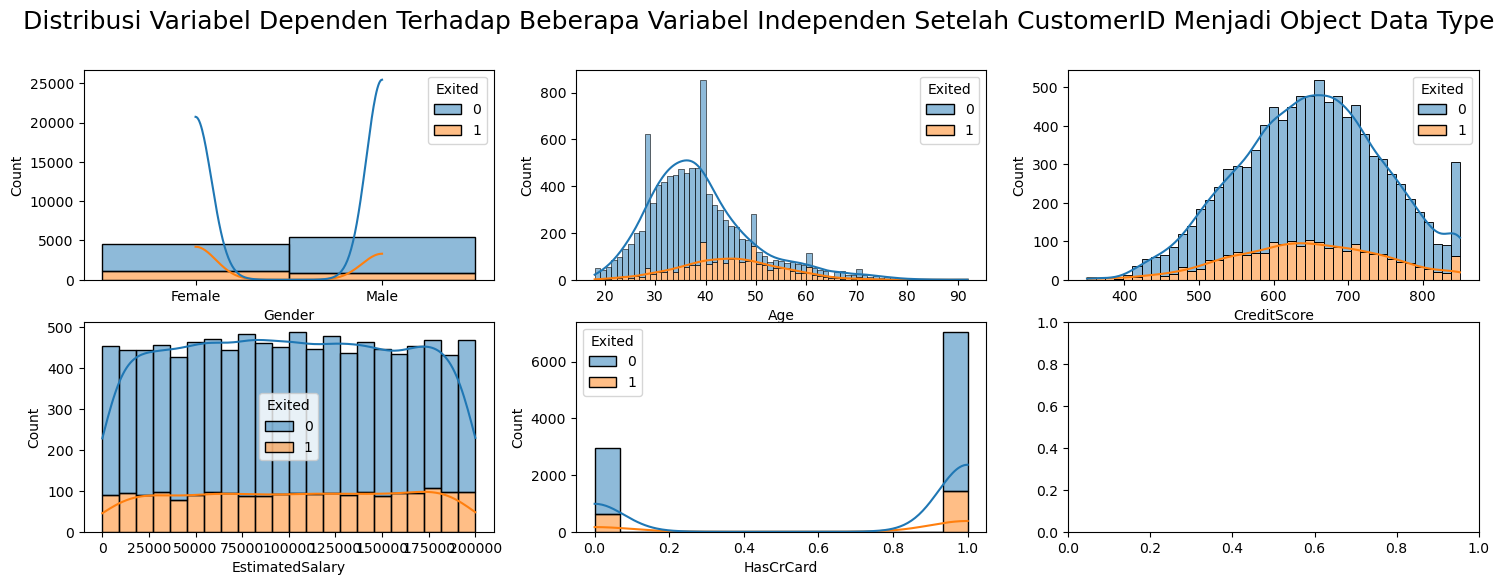

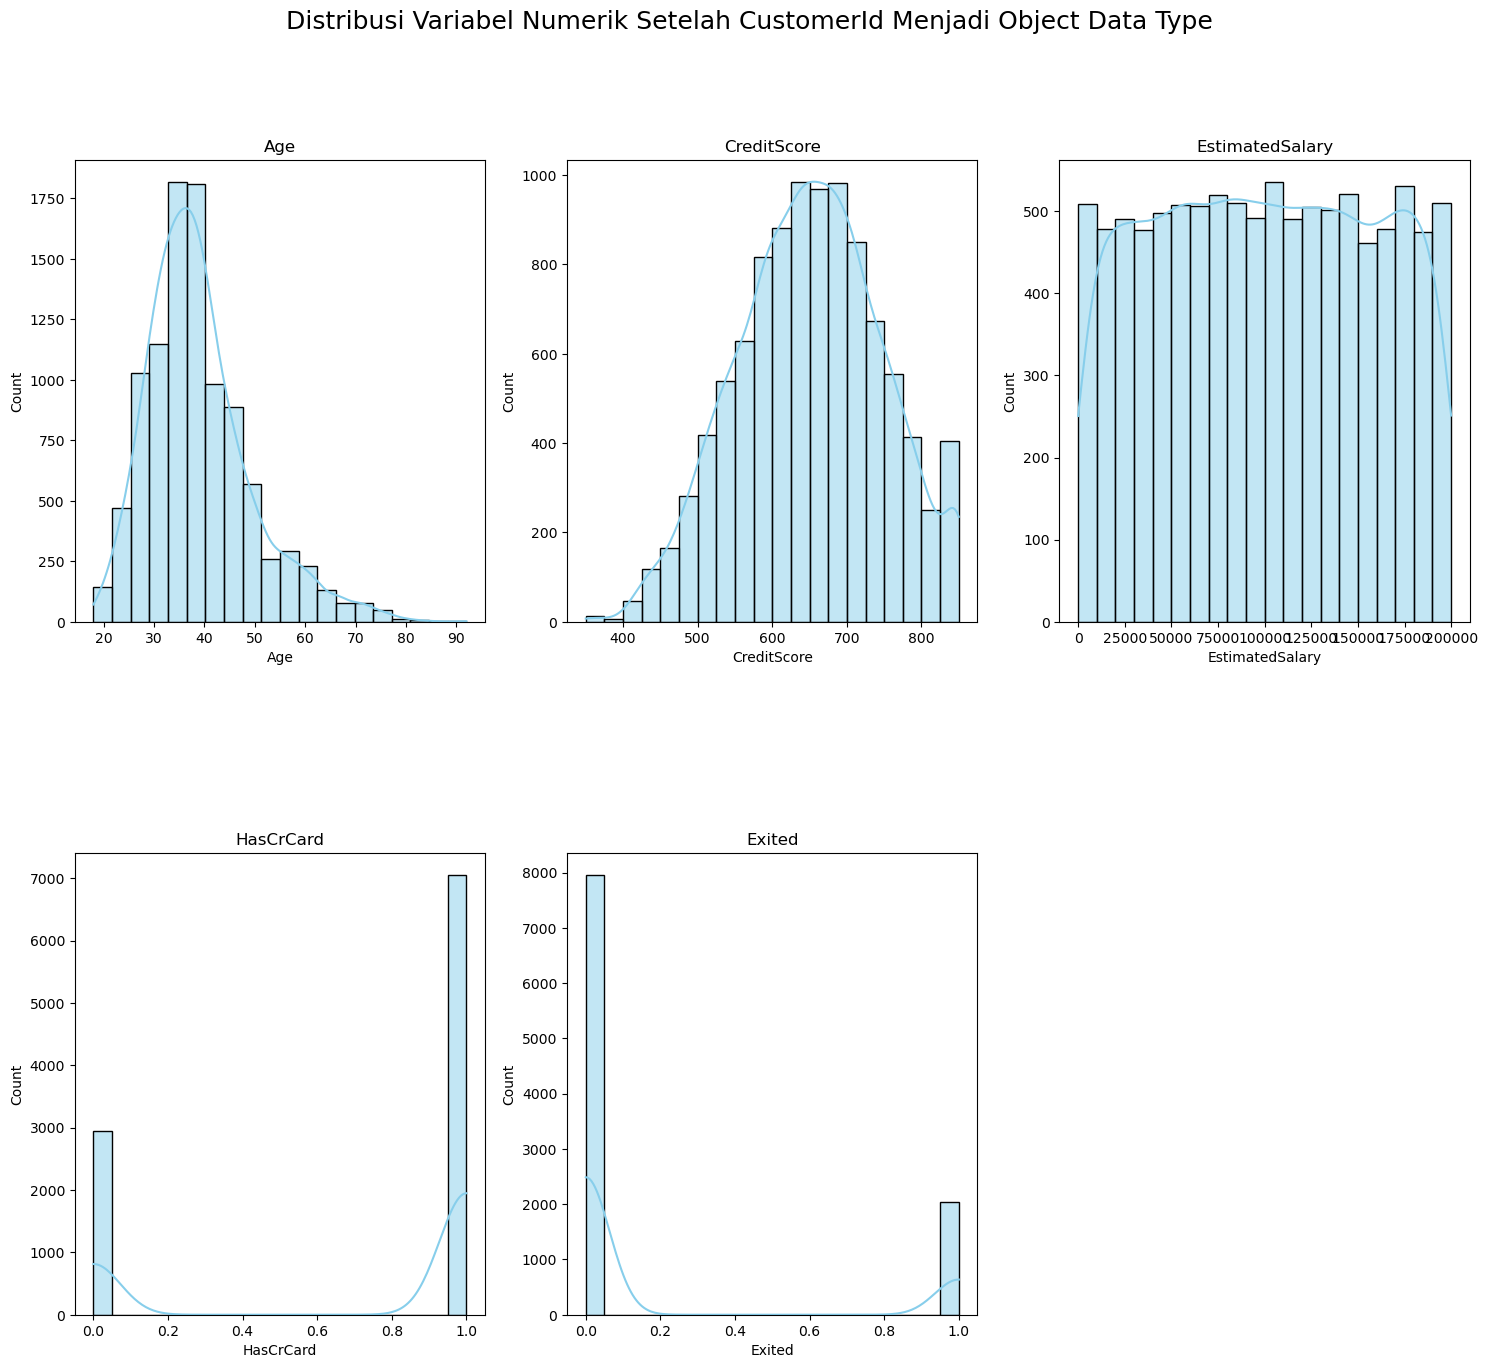

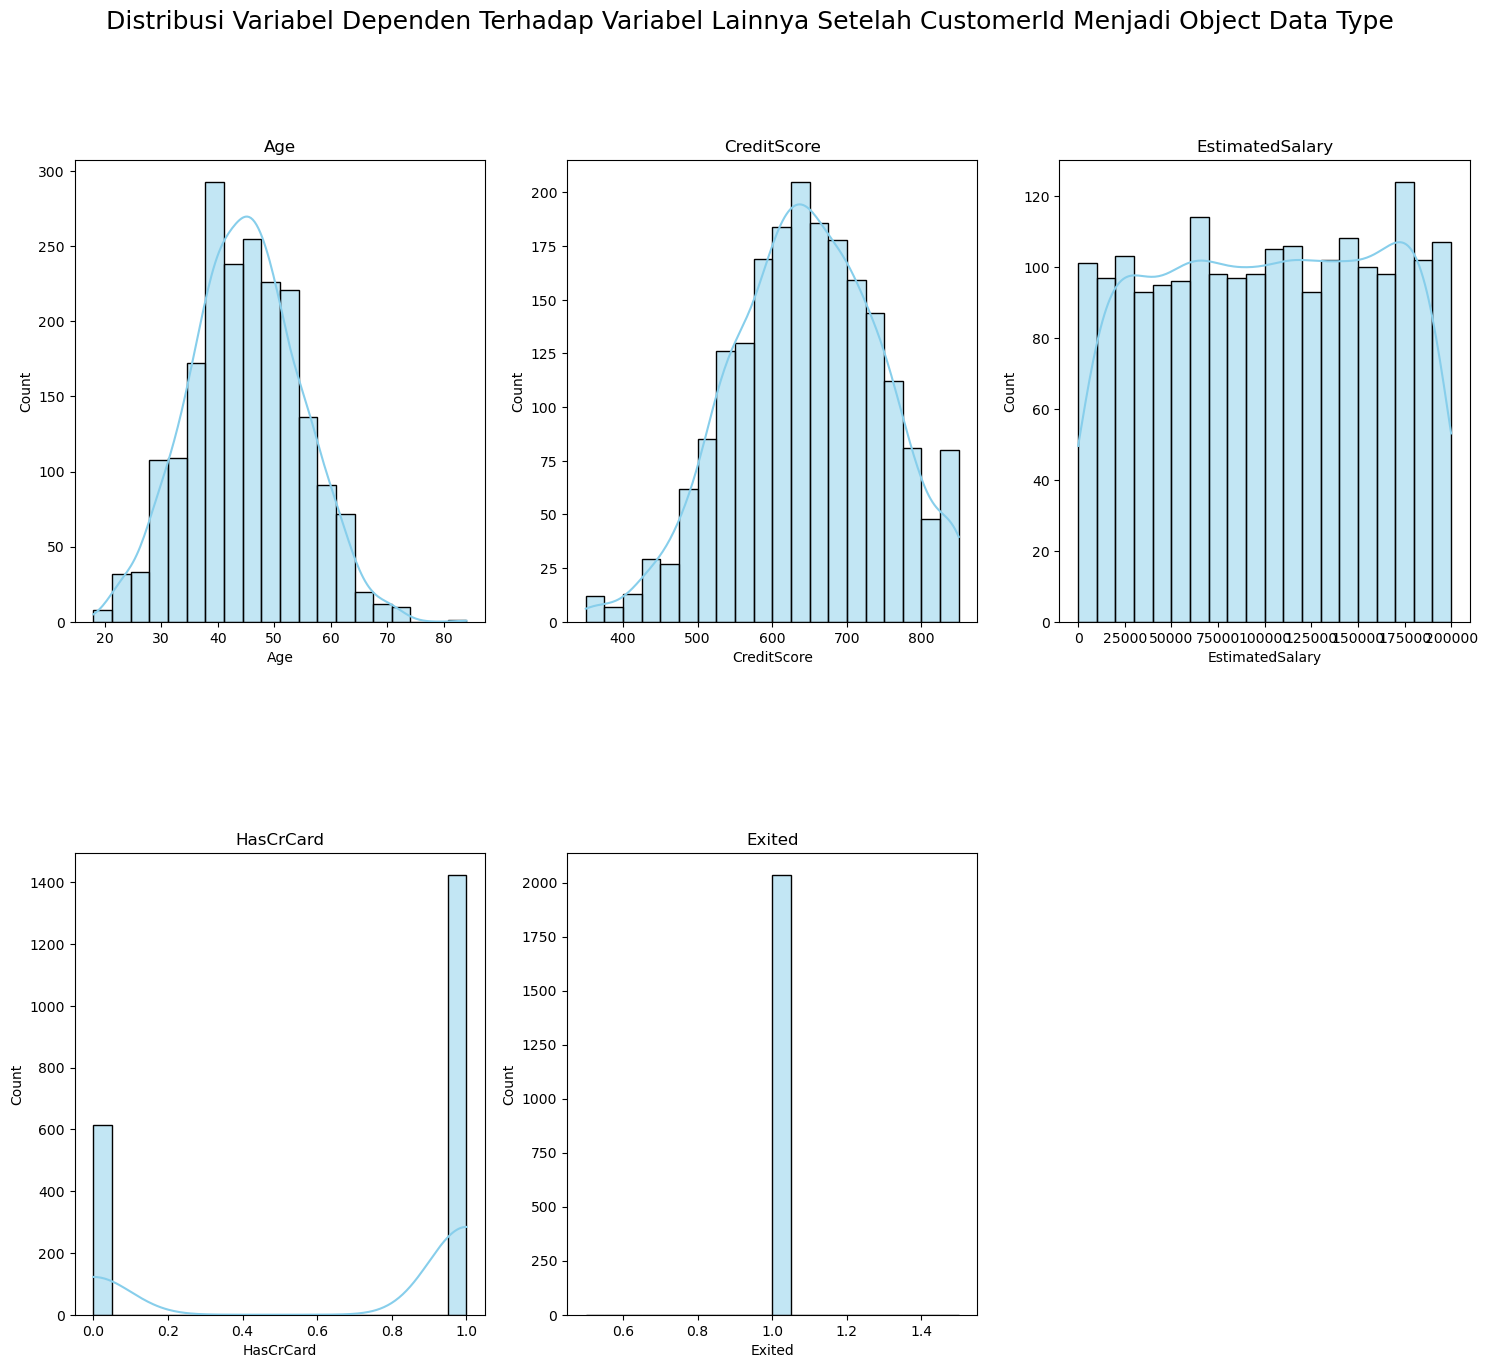

In [83]:
# Mengubah tipe data kolom 'CustomerId' menjadi 'object'
df['CustomerId'] = df['CustomerId'].astype('object')

# Menampilkan distribusi variabel dependen terhadap beberapa variabel independen
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender'
sns.histplot(x='Gender', hue='Exited', data=df, ax=axarr[0, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Age'
sns.histplot(x='Age', hue='Exited', data=df, ax=axarr[0, 1], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore'
sns.histplot(x='CreditScore', hue='Exited', data=df, ax=axarr[0, 2], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary'
sns.histplot(x='EstimatedSalary', hue='Exited', data=df, ax=axarr[1, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard'
sns.histplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1, 1], multiple='stack', kde=True)

fig.suptitle('Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen Setelah CustomerID Menjadi Object Data Type', fontsize=18)

# Menampilkan plot
plt.show()

# Menampilkan distribusi variabel numerik dalam DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_cols = df.select_dtypes(include=numerics)
columns = df_num_cols.columns[: len(df_num_cols.columns)]

fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)

fig.suptitle('Distribusi Variabel Numerik Setelah CustomerId Menjadi Object Data Type', fontsize=18)
plt.show()

# Menampilkan distribusi variabel dependen terhadap variabel lainnya
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_dependent_var = df[df['Exited']==1]
df_num_cols = df_dependent_var.select_dtypes(include=numerics)
columns = df_num_cols.columns[:len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)
fig.suptitle('Distribusi Variabel Dependen Terhadap Variabel Lainnya Setelah CustomerId Menjadi Object Data Type', fontsize=18)
plt.show()

In [84]:
# Mempersiapkan data
def data_prepare(df):
    df_prep = df.copy()

    # Encode variabel kategorikal
    df_prep = pd.get_dummies(df_prep, columns=['Gender'], drop_first=True)

    # Handle imbalance data menggunakan SMOTE
    smote = SMOTE(sampling_strategy='auto')
    X_smote, y_smote = smote.fit_resample(df_prep.drop('Exited', axis=1), df_prep['Exited'])

    # Menggabungkan hasil oversampling ke dalam DataFrame
    df_prep = pd.concat([pd.DataFrame(X_smote, columns=df_prep.drop('Exited', axis=1).columns), pd.Series(y_smote, name='Exited')], axis=1)

    return df_prep

# Menyimpan DataFrame yang telah dipersiapkan
df = data_prepare(df)

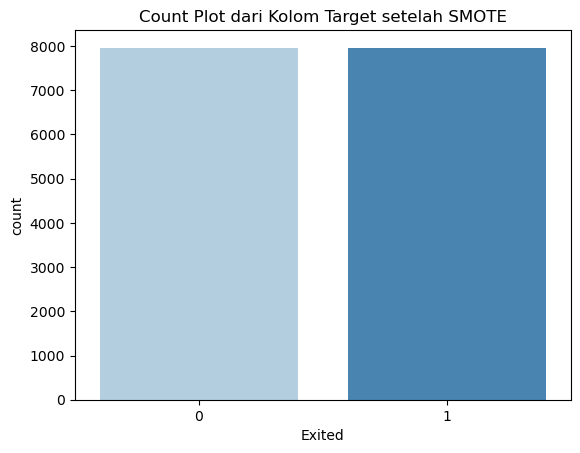

In [85]:
# Count plot dari kolom target setelah SMOTE
sns.countplot(x='Exited', data=df, palette='Blues')
plt.title('Count Plot dari Kolom Target setelah SMOTE')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Distribusi variabel dependen terhadap beberapa variabel independen setelah SMOTE:
Exited 0 count: 7963
Exited 1 count: 7963


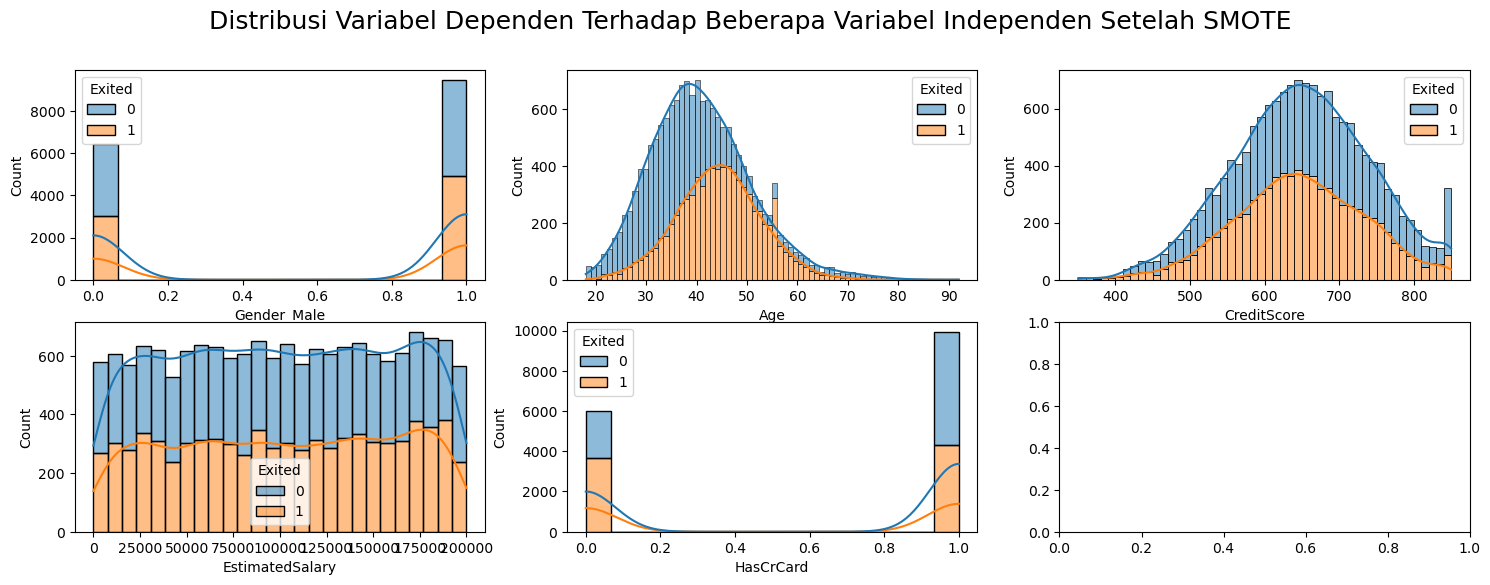

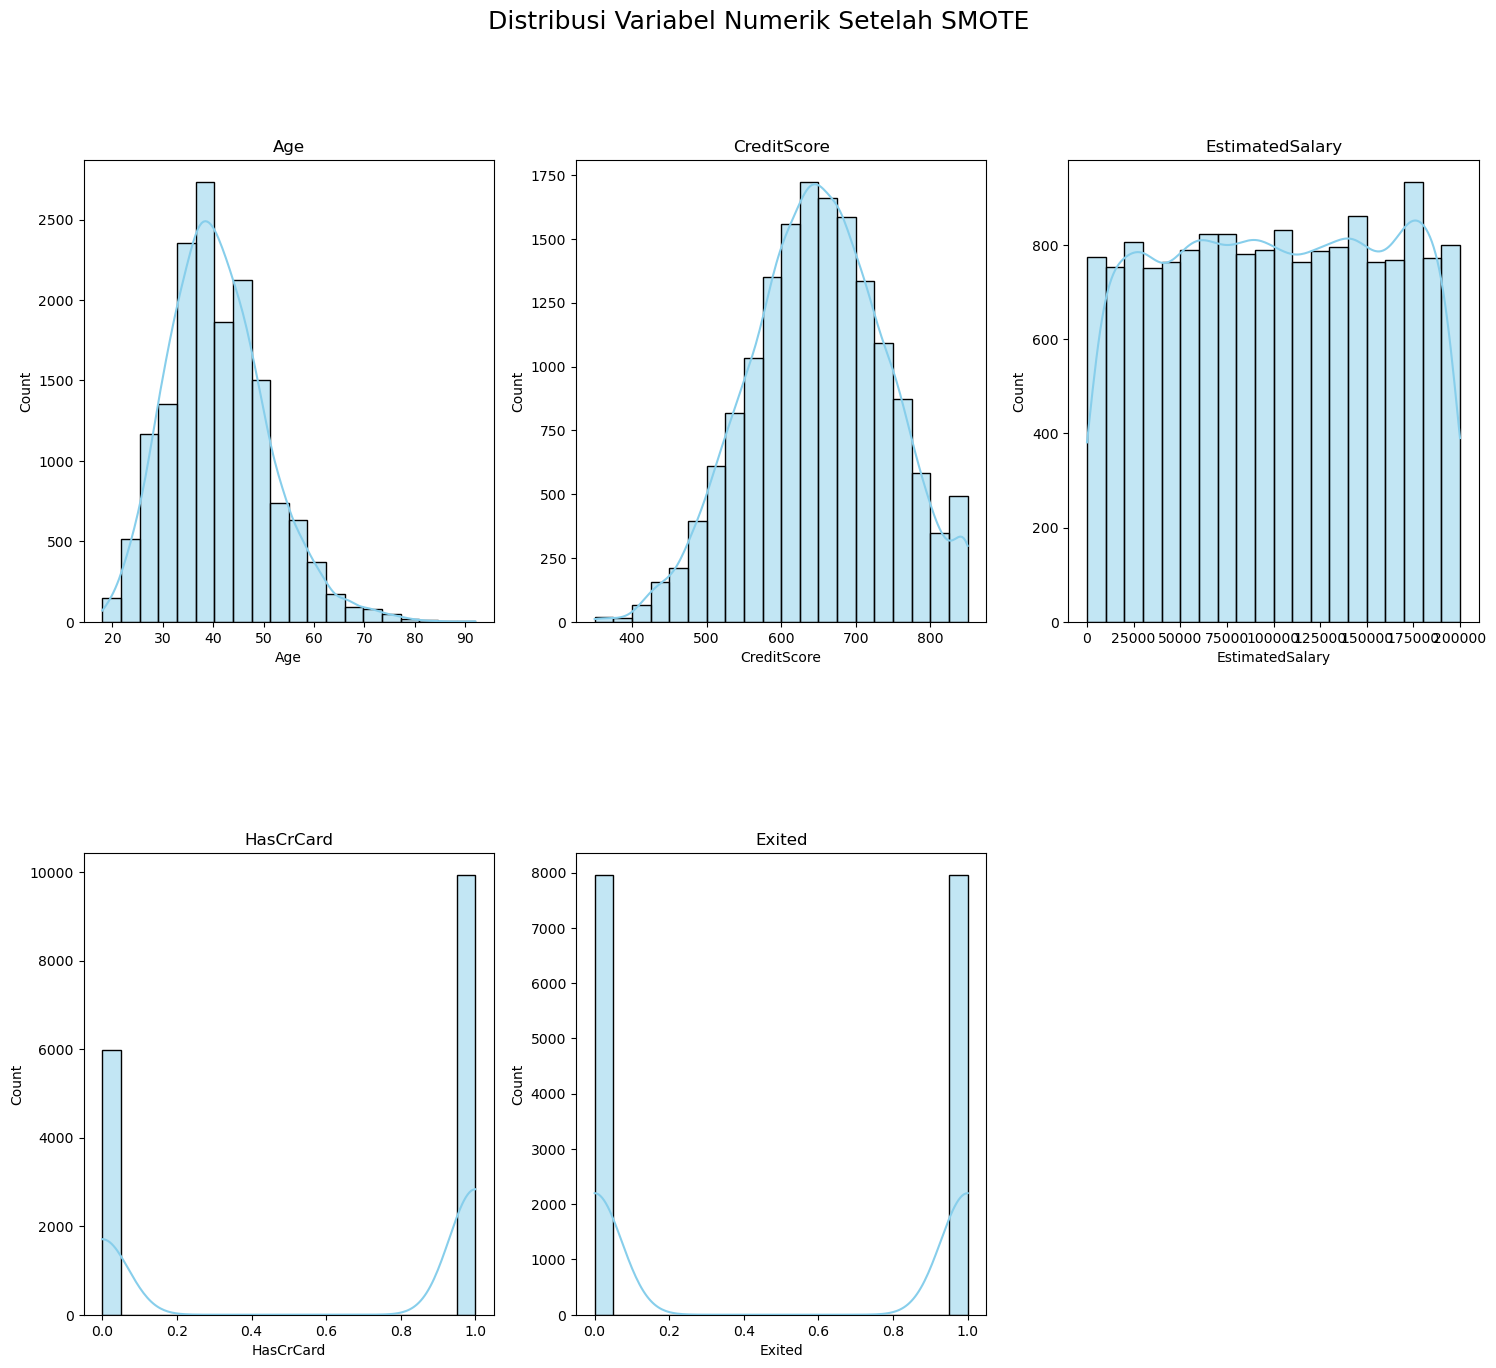

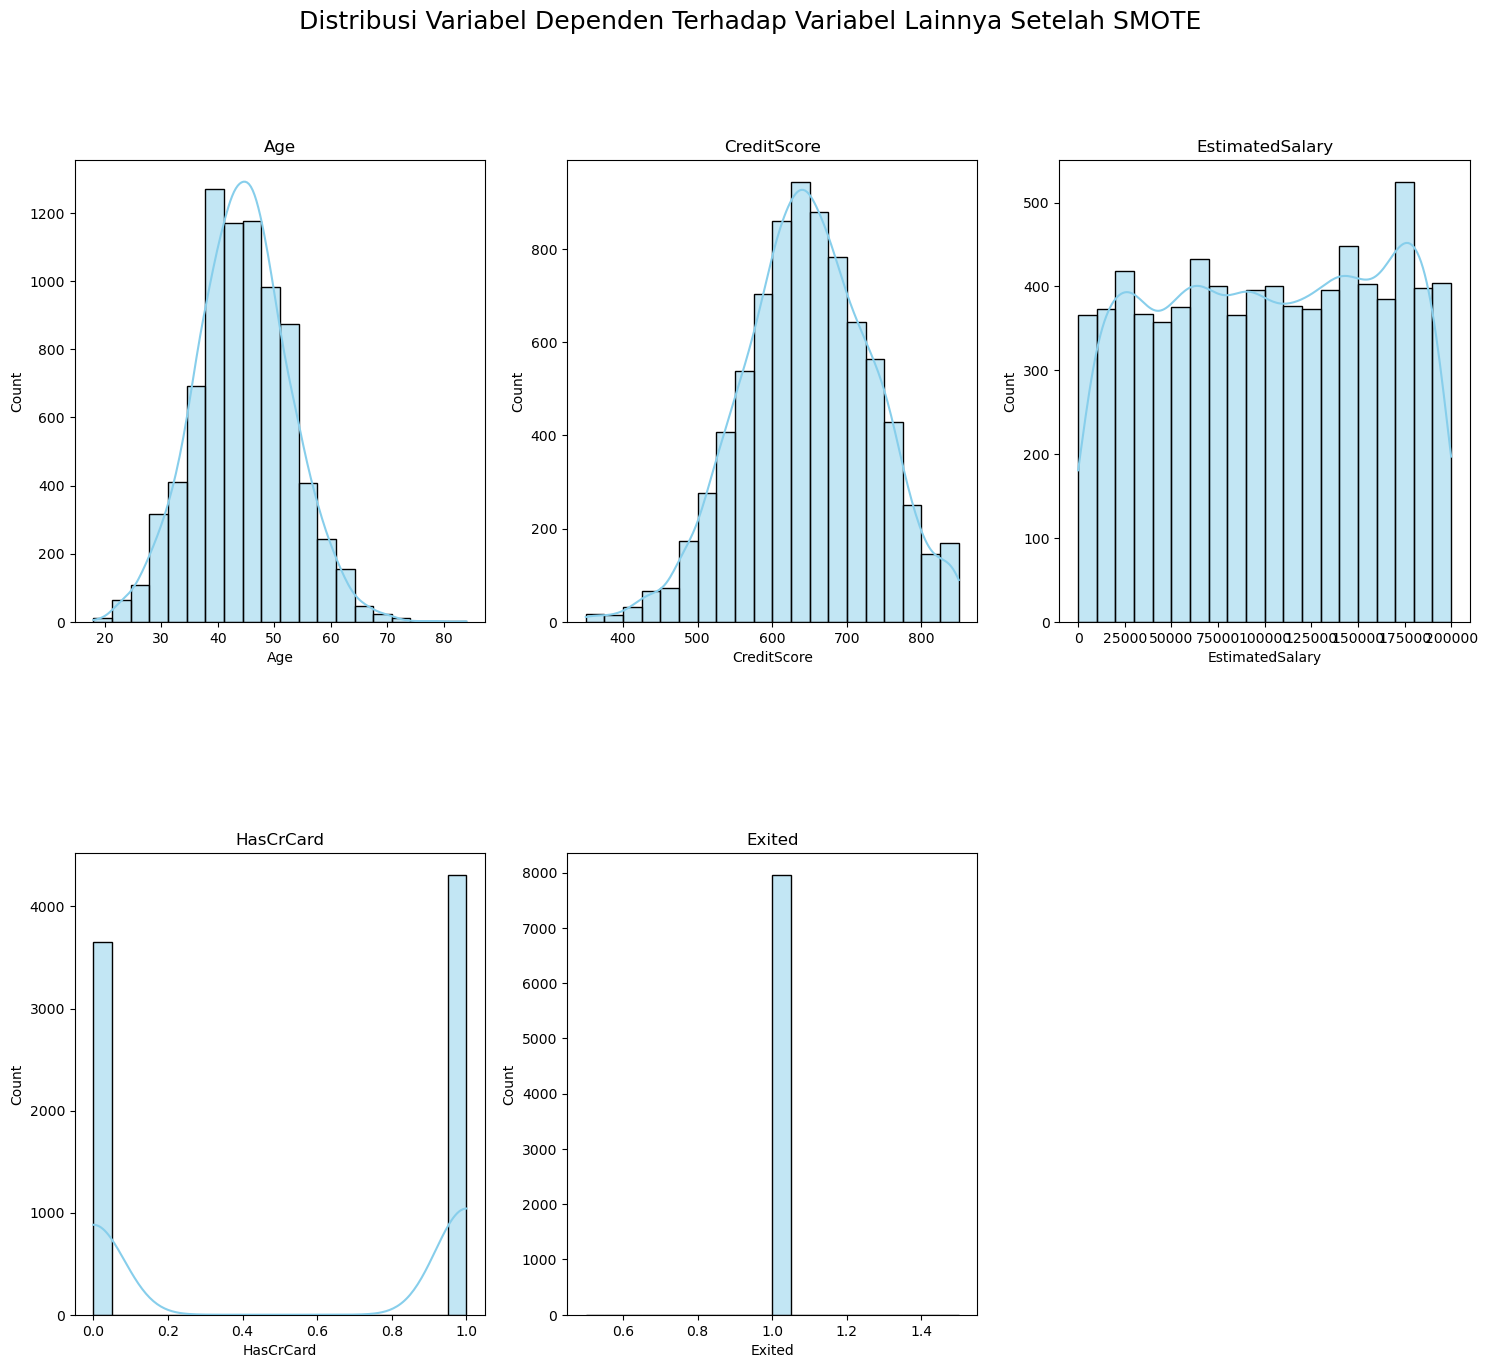

In [86]:
# 1
# Menampilkan distribusi variabel dependen terhadap beberapa variabel independen
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender_Male'
sns.histplot(x='Gender_Male', hue='Exited', data=df, ax=axarr[0, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Age'
sns.histplot(x='Age', hue='Exited', data=df, ax=axarr[0, 1], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore'
sns.histplot(x='CreditScore', hue='Exited', data=df, ax=axarr[0, 2], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary'
sns.histplot(x='EstimatedSalary', hue='Exited', data=df, ax=axarr[1, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard'
sns.histplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1, 1], multiple='stack', kde=True)

# Menghitung jumlah nilai 0 (tidak Exited) dan nilai 1 (Exited) pada variabel dependen 'Exited'
zero_count, one_count = df['Exited'].value_counts()
print("Distribusi variabel dependen terhadap beberapa variabel independen setelah SMOTE:")
print("Exited 0 count:", zero_count)
print("Exited 1 count:", one_count)

fig.suptitle('Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen Setelah SMOTE', fontsize=18)

# Save the plot as a PNG image
plt.savefig("output3.png")

# Menampilkan plot
plt.show()



# 2
# Menampilkan distribusi variabel numerik dalam DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_cols = df.select_dtypes(include=numerics)
columns = df_num_cols.columns[: len(df_num_cols.columns)]

fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)

fig.suptitle('Distribusi Variabel Numerik Setelah SMOTE', fontsize=18)
plt.show()

# 3
# Menampilkan distribusi variabel dependen terhadap variabel lainnya
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_dependent_var = df[df['Exited']==1]
df_num_cols = df_dependent_var.select_dtypes(include=numerics)
columns = df_num_cols.columns[:len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)
fig.suptitle('Distribusi Variabel Dependen Terhadap Variabel Lainnya Setelah SMOTE', fontsize=18)
plt.show()

1. **Gender:**
- Sebelum SMOTE, Female memiliki jumlah yang lebih tinggi pada kategori '1' (Exited) dibandingkan dengan Male.
- Setelah SMOTE, perbedaan jumlah antara Female dan Male pada kategori '1' (Exited) masih lebih tinggi.

2. **Age:**
- Sebelum SMOTE, kategori umur '30 - 50' memiliki jumlah Exited yang tinggi.
- Setelah SMOTE, terdapat peningkatan jumlah Exited pada kategori '30 - 50'.

3. **CreditScore:**
- Sebelum SMOTE, skor kredit di bawah rata-rata memiliki jumlah Exited yang lebih rendah dibandingkan dengan skor kredit di atas rata-rata.
- Setelah SMOTE, terjadi perbedaan yang sangat signifikan pada 'Exited = 1' sedangkan yang 'Exited = 0' tetap ada perubahan namun tidak signifikan.

4. **EstimatedSalary:**
- Sebelum SMOTE, kategori pendapatan di bawah rata-rata dan di atas rata-rata memiliki jumlah Exited yang cukup seimbang.
- Setelah SMOTE, terjadi perbedaan yang sangat signifikan pada 'Exited = 1' sedangkan yang 'Exited = 0' tetap ada perubahan namun tidak signifikan.


5. **HasCrCard:**
- Sebelum SMOTE, terdapat perbedaan yang signifikan antara pemegang kartu kredit (HasCrCard=1) dan bukan pemegang kartu kredit (HasCrCard=0) dalam hal jumlah Exited.
- Setelah SMOTE, terjadi perbedaan yang sangat signifikan pada 'Exited = 1' sedangkan yang 'Exited = 0' tetap ada perubahan namun tidak signifikan.

SMOTE berhasil menyeimbangkan jumlah sampel antara kelas Exited (1) dan kelas Not Exited (0), mengurangi ketidakseimbangan kelas yang dapat memengaruhi kinerja model klasifikasi.

### 2.3.2 Handling Missing Values

In [87]:
def process_and_display_data(df):
    # Menangani nilai yang hilang
    missing_values = df.isnull().sum()

    # Memeriksa missing values
    print("Jumlah missing values:")
    print(missing_values)
    print("\n")

    show_unique_count_variables(df)

    return df

df = process_and_display_data(df)

Jumlah missing values:
CustomerId         0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Gender_Male        0
Exited             0
dtype: int64



Jumlah nilai unik:
CustomerId         15926
Age                   70
CreditScore          473
EstimatedSalary    15925
HasCrCard              2
Gender_Male            2
Exited                 2
dtype: int64


### 2.3.3 Handling Outliers

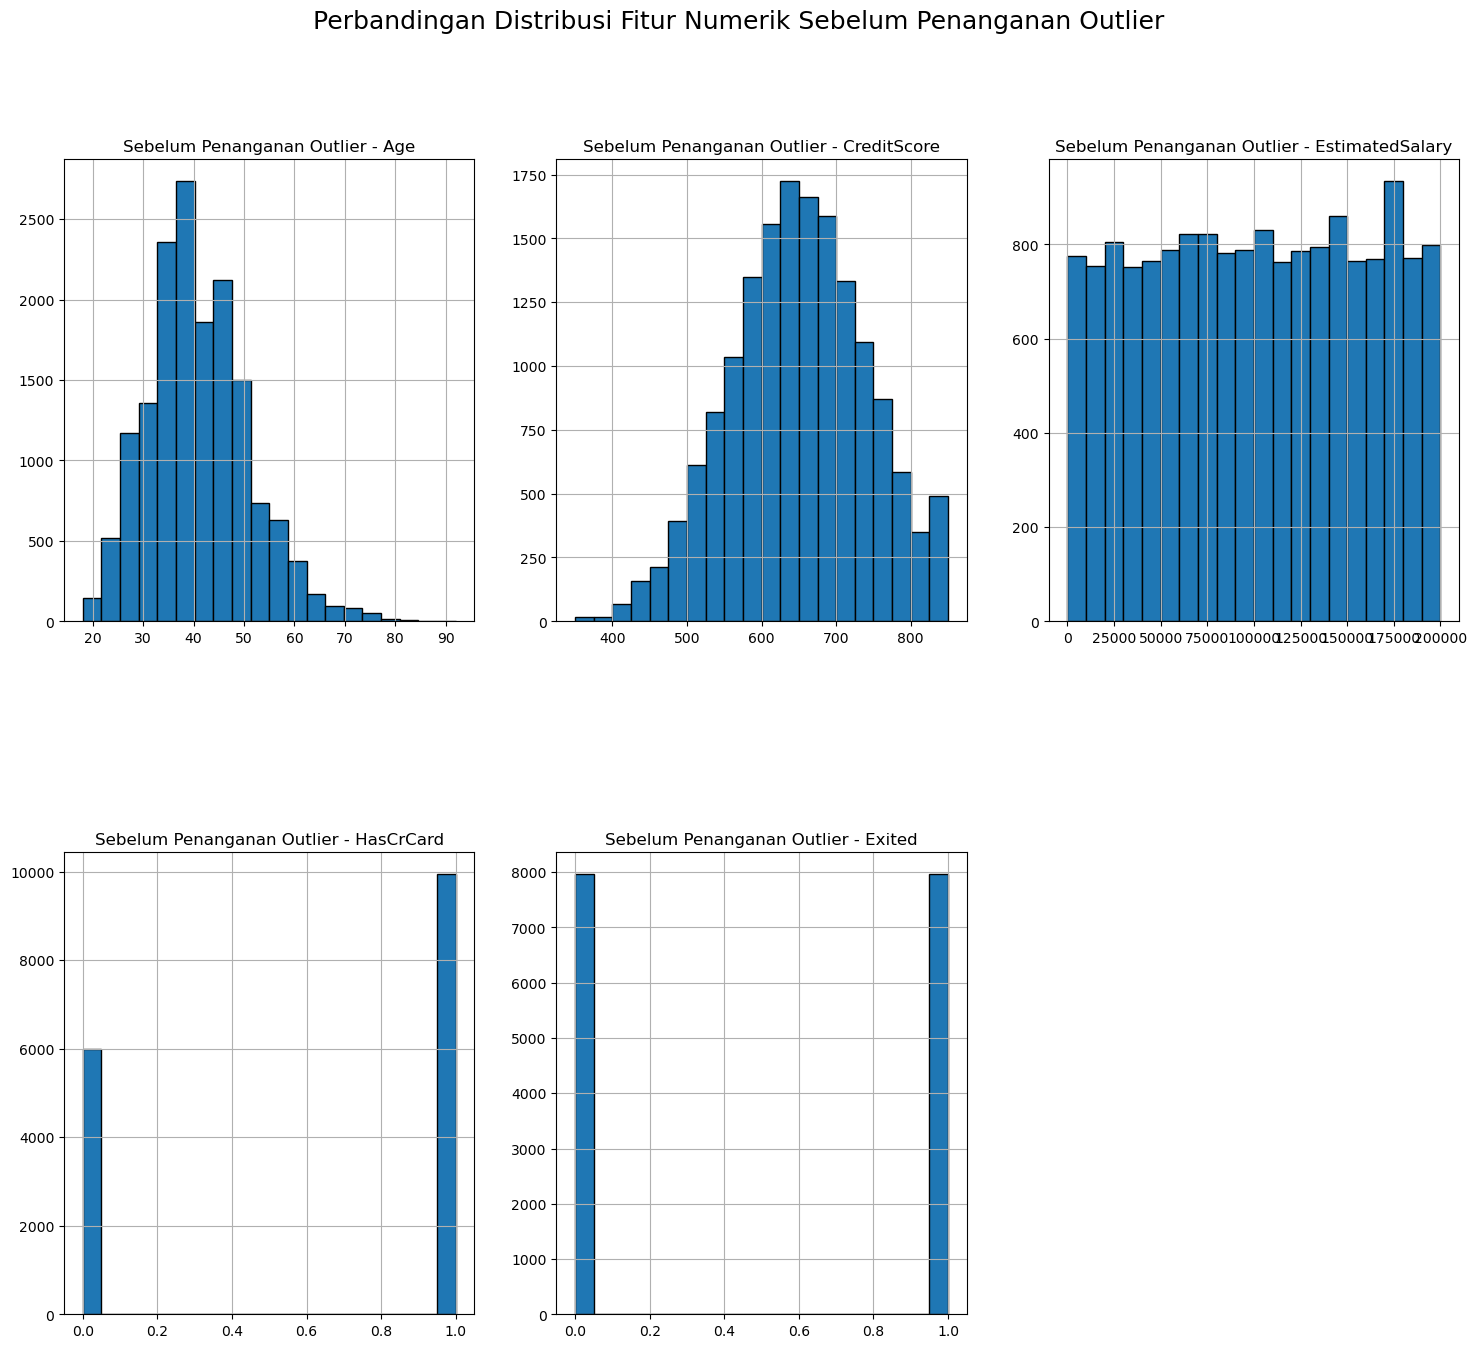

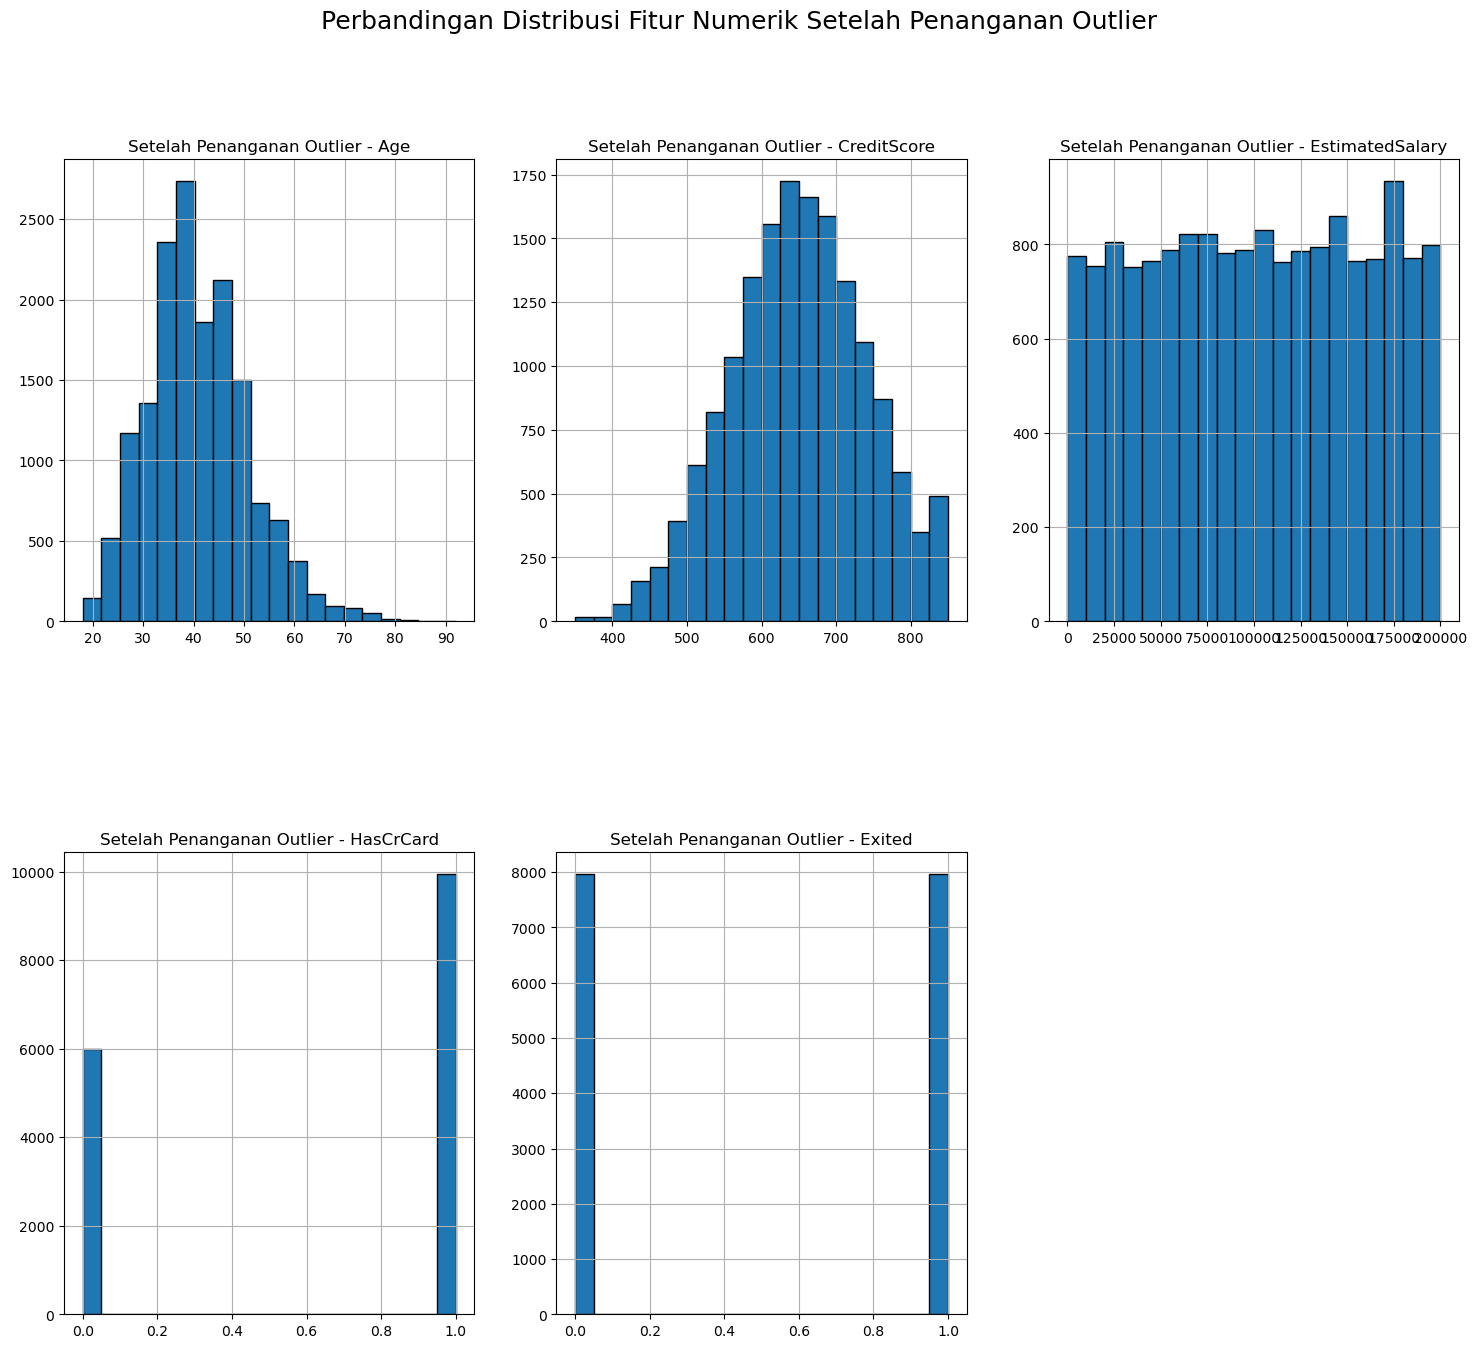

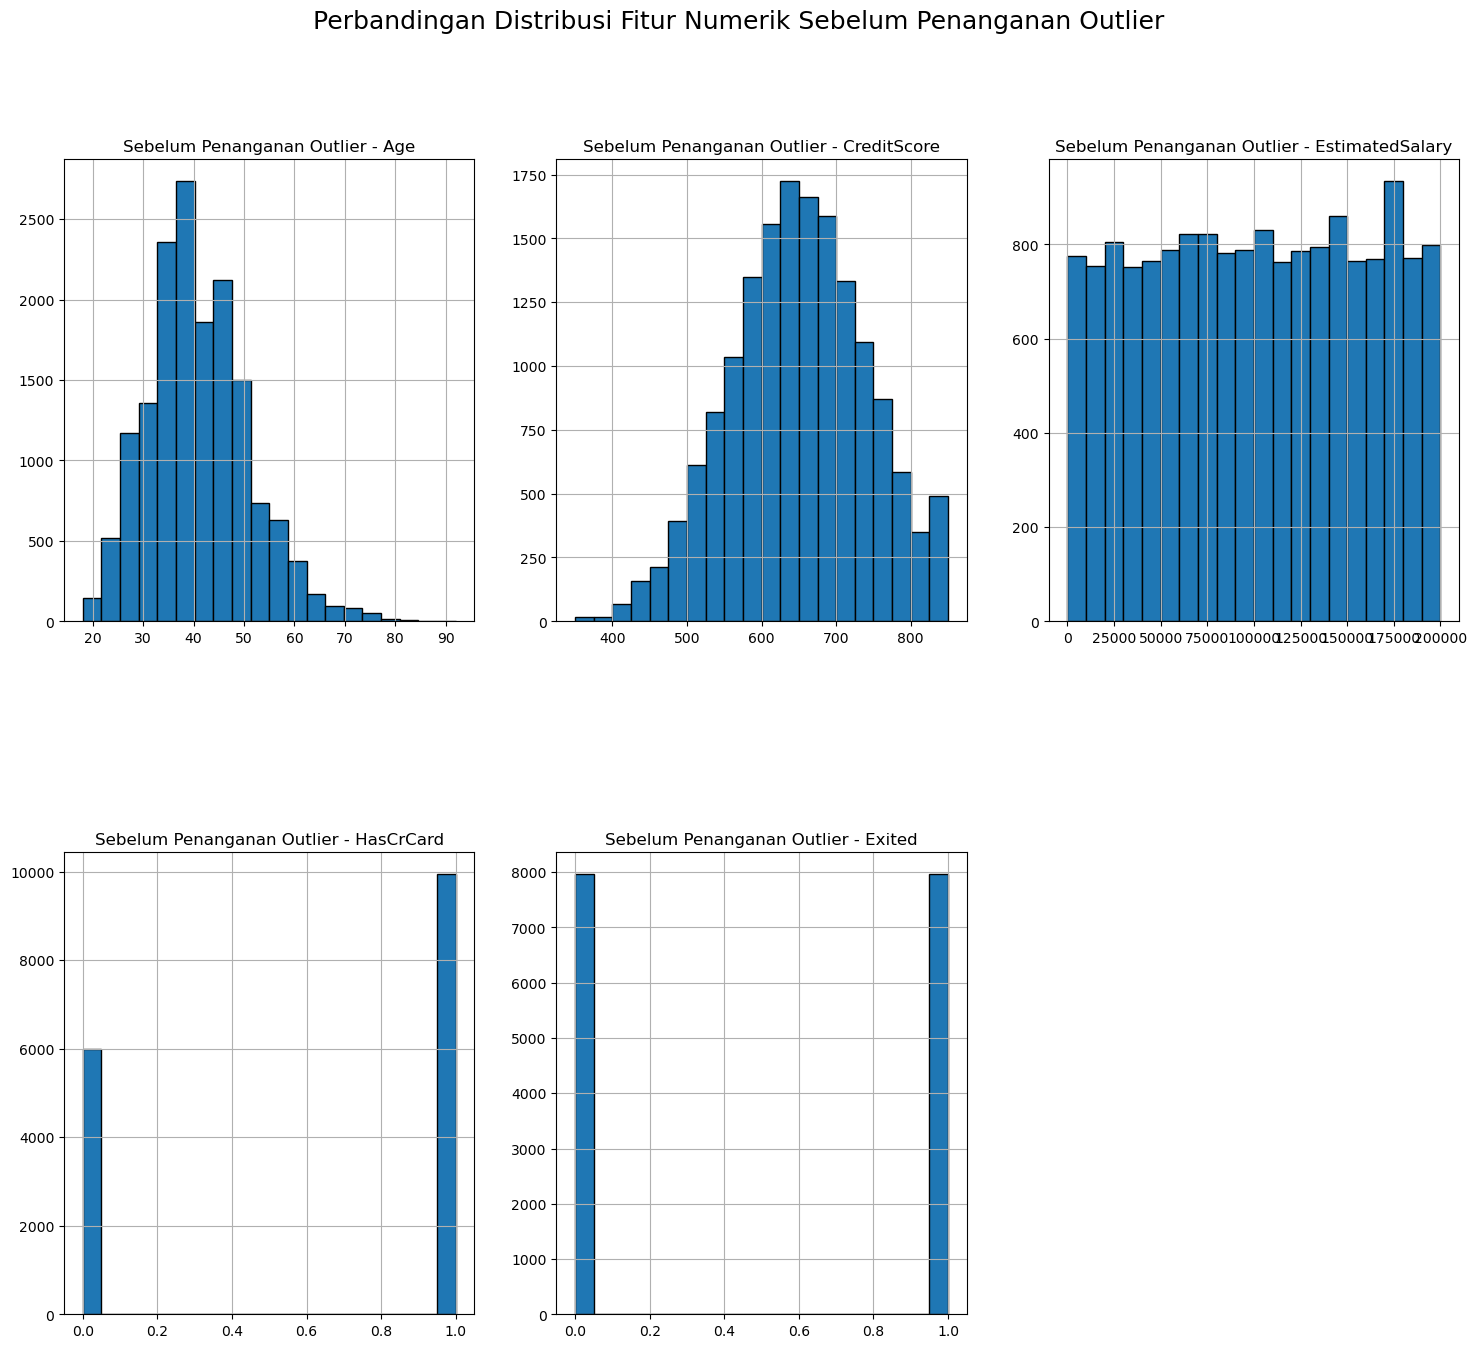

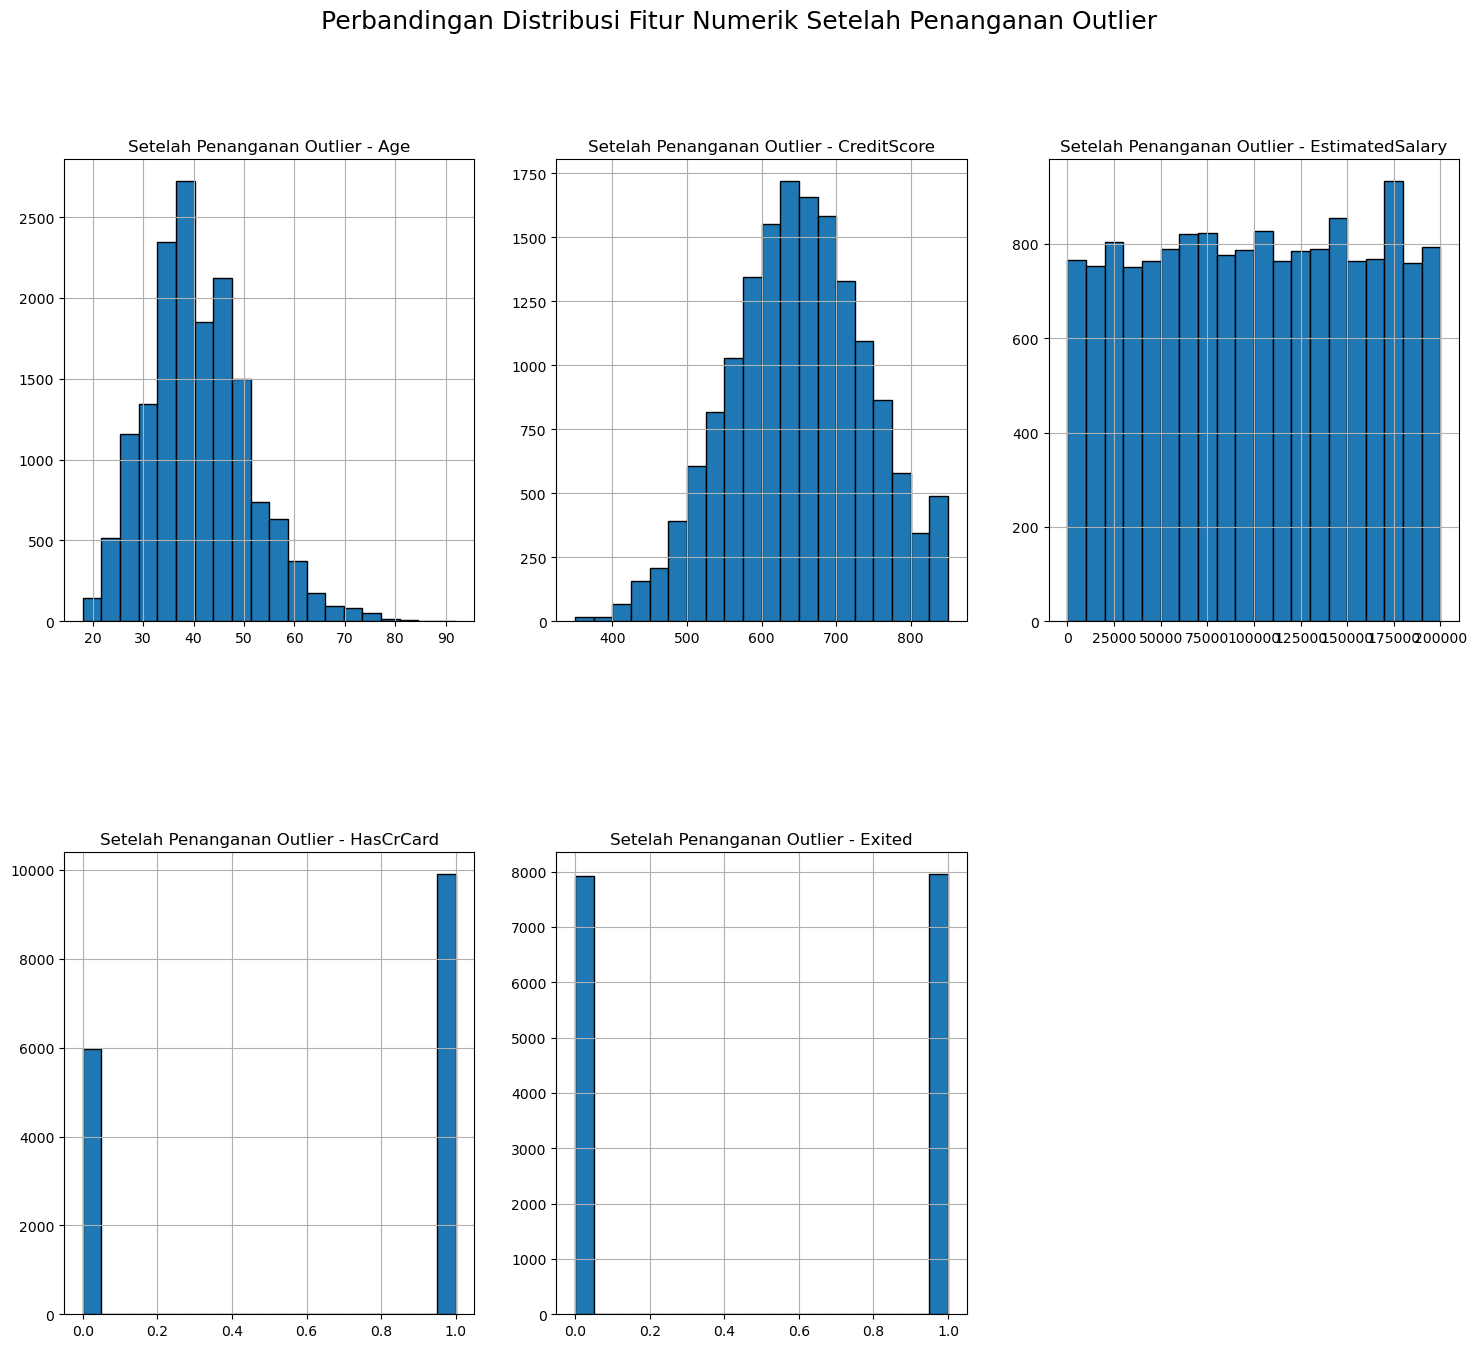

In [88]:
def handle_outliers(df):
    # Mendeteksi outlier menggunakan metode Local Outlier Factor (LOF)
    lof = LocalOutlierFactor()
    outliers = lof.fit_predict(df.drop('Exited', axis=1))
    df_no_outliers = df.loc[outliers != -1]
    return df_no_outliers

def plot_outlier_comparison(df_before, df_after):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    # Memilih kolom numerik dari dataframe sebelumnya
    df_num_cols_before = df_before.select_dtypes(include=numerics)
    columns_before = df_num_cols_before.columns[:len(df_num_cols_before.columns)]

    fig_before = plt.figure()
    fig_before.set_size_inches(18, 15)
    length_before = len(columns_before)

    for i, j in zip(columns_before, range(length_before)):
        plt.subplot(int(length_before / 2), 3, j + 1)
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        df_num_cols_before[i].hist(bins=20, edgecolor='black')
        plt.title(f'Sebelum Penanganan Outlier - {i}')

    fig_before.suptitle('Perbandingan Distribusi Fitur Numerik Sebelum Penanganan Outlier', fontsize=18)
    plt.show()

    # Memilih kolom numerik dari dataframe setelah penanganan outlier
    df_num_cols_after = df_after.select_dtypes(include=numerics)
    columns_after = df_num_cols_after.columns[:len(df_num_cols_after.columns)]

    fig_after = plt.figure()
    fig_after.set_size_inches(18, 15)
    length_after = len(columns_after)

    for i, j in zip(columns_after, range(length_after)):
        plt.subplot(int(length_after / 2), 3, j + 1)
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        df_num_cols_after[i].hist(bins=20, edgecolor='black')
        plt.title(f'Setelah Penanganan Outlier - {i}')

    fig_after.suptitle('Perbandingan Distribusi Fitur Numerik Setelah Penanganan Outlier', fontsize=18)
    plt.show()

# Muat dataframe 'df' di sini

# Sebelum penanganan outlier
plot_outlier_comparison(df, df)

# Setelah penanganan outlier
df_no_outliers = handle_outliers(df)
plot_outlier_comparison(df, df_no_outliers)

1. **EstimatedSalary:**
- Setelah mengunakan metode LOF jumlah baris EstimatedSalary berkurang.
- Hal ini menunjukkan bahwa ada beberapa nilai yang dianggap sebagai outlier pada variabel EstimatedSalary.

2. **Konsistensi pada Variabel Lain:**
- Variabel lain seperti Age, CreditScore, HasCrCard, Gender_Male, dan Exited tidak mengalami perubahan signifikan dalam jumlah nilai unik setelah handling outlier.
- Hal ini menunjukkan bahwa LOF lebih fokus pada identifikasi outlier pada variabel tertentu (dalam hal ini, EstimatedSalary).

### 2.3.4 Matriks Korelasi Antara Variabel Numerik

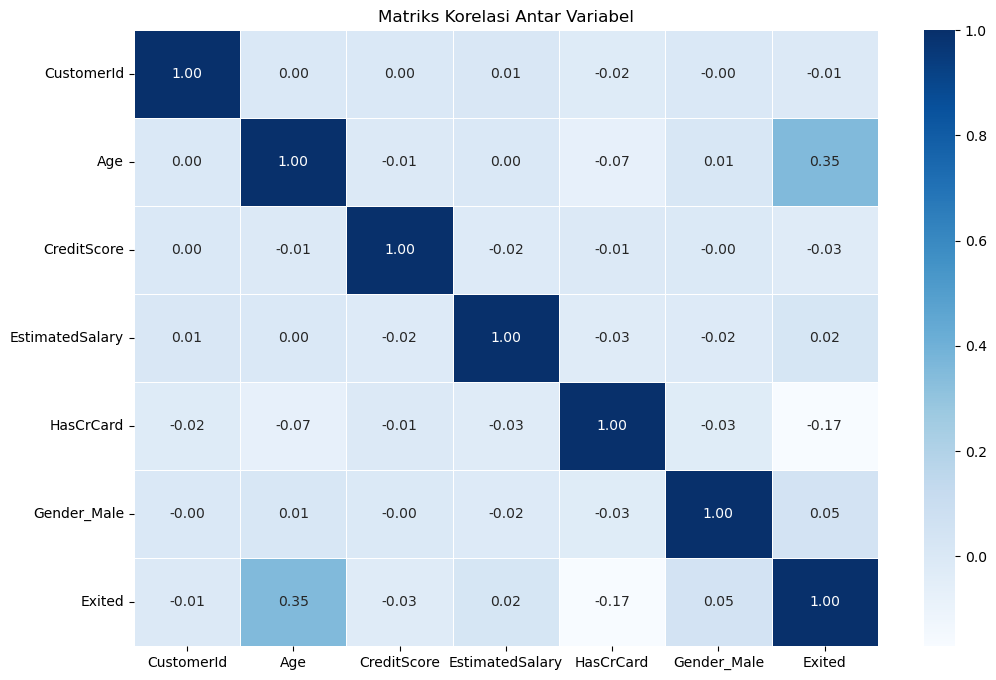

In [89]:
# Matriks korelasi
correlation_matrix = df.corr()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')

# Save the plot as a PNG image
plt.savefig("output2.png")

plt.show()

1. **Korelasi antara Umur (Age) dan Exited:**
- Korelasi positif menunjukkan bahwa ada hubungan yang moderat antara usia nasabah dan kecenderungan untuk keluar dari layanan.
- Ini dapat diartikan bahwa semakin tua seseorang, semakin cenderung mereka bertahan dalam layanan.

2. **Korelasi antara Jenis Kelamin (Gender) dan Exited:**
- Korelasi negatif menunjukkan bahwa terdapat hubungan cukup negatif antara jenis kelamin (laki-laki) dan kecenderungan untuk keluar dari layanan.
- Hal ini dapat diartikan bahwa nasabah perempuan mungkin cenderung lebih loyal terhadap layanan dibandingkan dengan nasabah laki-laki.

3. **Korelasi antara Kepemilikan Kartu Kredit (HasCrCard) dan Exited:**
- Korelasi negatif menunjukkan bahwa kepemilikan kartu kredit memiliki pengaruh cukup negatif terhadap kecenderungan keluar dari layanan.
- Artinya, nasabah yang memiliki kartu kredit cenderung lebih setia terhadap layanan.

4. **Korelasi antara Skor Kredit (CreditScore) dan Exited:**
- Korelasi negatif menunjukkan bahwa terdapat hubungan yang kurang kuat antara skor kredit dan kecenderungan keluar dari layanan.
- Hal ini mungkin menandakan bahwa nasabah dengan skor kredit yang lebih tinggi memiliki kecenderungan yang sedikit lebih rendah untuk keluar dari layanan.

5. **Korelasi antara Estimasi Pendapatan (EstimatedSalary) dan Exited:**
- Korelasi positif yang sangat lemah menunjukkan bahwa tidak ada korelasi yang signifikan antara estimasi pendapatan dan kecenderungan keluar dari layanan.
- Dengan kata lain, estimasi pendapatan tidak menjadi faktor utama yang mempengaruhi keputusan nasabah untuk keluar dari layanan.

5. **Korelasi antara Kepemilikan Kartu Kredit (HasCrCard) dan Jenis Kelamin (Gender):**
- Korelasi positif menunjukkan bahwa ada hubungan positif yang kurang kuat antara kepemilikan kartu kredit dan jenis kelamin laki-laki.
- Artinya, laki-laki mungkin sedikit lebih mungkin memiliki kartu kredit.

In [90]:
# Membuat salinan DataFrame
df_copy = df.copy()

# Menghapus kolom 'CustomerId' dalam DataFrame asli
df.drop('CustomerId', axis=1, inplace=True)

# 3. Model Training

PIC : Timmy, Eko

## 3.1 Splitting & Scaling Data

In [91]:
def model_prepare(df_model):
    y = df_model[dependent_variable_name]
    X = df_model.loc[:, df_model.columns != dependent_variable_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    return X_train, X_test, y_train, y_test

## 3.2 Model Training

In [92]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LOGR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('LightGBM', LGBMClassifier()))
    models.append(('SVM', SVC()))
    models.append(('AdaBoost', AdaBoostClassifier()))

    res_cols = ["model", "accuracy_score", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        # df_result.at[index, res_cols] = idx_res_values
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    return df_result.sort_values('accuracy_score', ascending=False)
    # df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    # return df_result

In [93]:
# Model_prepare test, train split 0.2
X_train, X_test, y_train, y_test = model_prepare(df_model=df)

In [94]:
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559


,model,accuracy_score,0_precision,0_recall,1_precision,1_recall
3,RF,0.729755,0.74125,0.726271,0.718159,0.733419
5,XGBoost,0.728186,0.738941,0.726271,0.717268,0.7302
6,LightGBM,0.727244,0.736094,0.729333,0.718112,0.725048
8,AdaBoost,0.719711,0.725885,0.728108,0.713178,0.710882
7,SVM,0.71877,0.719476,0.739743,0.717983,0.696716
4,GBM,0.716259,0.722121,0.725658,0.710032,0.706375
0,LOGR,0.702134,0.705036,0.720147,0.698946,0.683194
1,KNN,0.696485,0.714286,0.679731,0.679534,0.714102
2,CART,0.674827,0.689044,0.666258,0.660859,0.683838


## 3.2.1 | Logistic Regression

In [95]:
# Create the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = log_reg_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = log_reg_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7006279434850864
Validation Accuracy: 0.7021343377275581


,0,1,accuracy,macro avg,weighted avg
precision,0.705036,0.698946,0.702134,0.701991,0.702067
recall,0.720147,0.683194,0.702134,0.701670,0.702134
f1-score,0.712511,0.690980,0.702134,0.701746,0.702016
support,1633.000000,1553.000000,0.702134,3186.000000,3186.000000


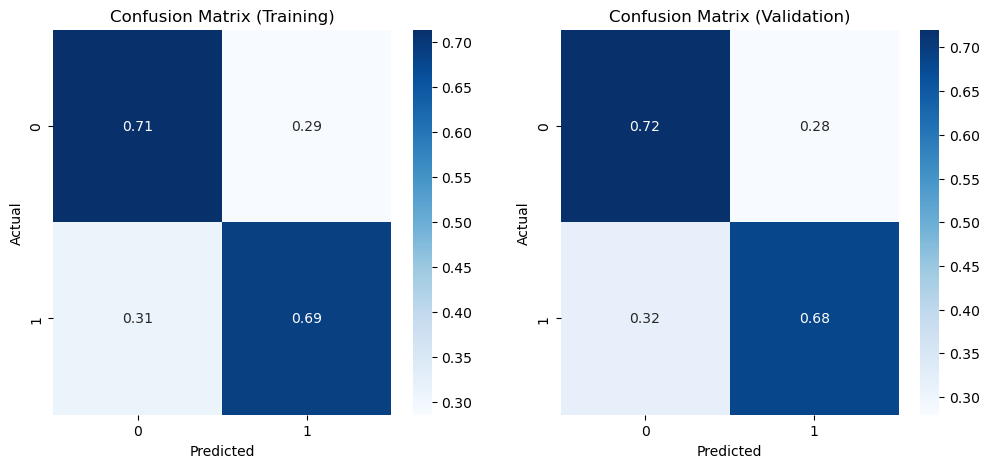

In [96]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.2"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning of Logistic Regression </b></span>

In [97]:
# Define the hyperparameter grid to search
param_grid = {'solver': ['lbfgs', 'sag', 'saga'],
              'penalty': ['l1', 'l2'],
              'C': [100, 10, 1]}

# Create the Logistic Regression model
log_reg_model = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.700392464678179
Validation Accuracy: 0.7021343377275581


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

,0,1,accuracy,macro avg,weighted avg
precision,0.705036,0.698946,0.702134,0.701991,0.702067
recall,0.720147,0.683194,0.702134,0.701670,0.702134
f1-score,0.712511,0.690980,0.702134,0.701746,0.702016
support,1633.000000,1553.000000,0.702134,3186.000000,3186.000000


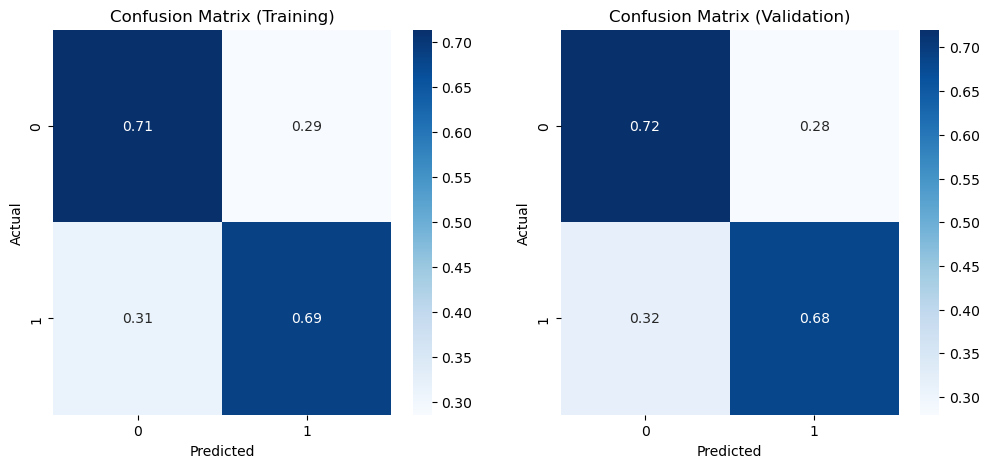

In [98]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.2 | KNN

In [99]:
# Create the KNN classifier model (you can adjust the number of neighbors 'n_neighbors')
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = knn_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = knn_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7990580847723705
Validation Accuracy: 0.6964846202134338


,0,1,accuracy,macro avg,weighted avg
precision,0.714286,0.679534,0.696485,0.696910,0.697346
recall,0.679731,0.714102,0.696485,0.696916,0.696485
f1-score,0.696580,0.696389,0.696485,0.696485,0.696487
support,1633.000000,1553.000000,0.696485,3186.000000,3186.000000


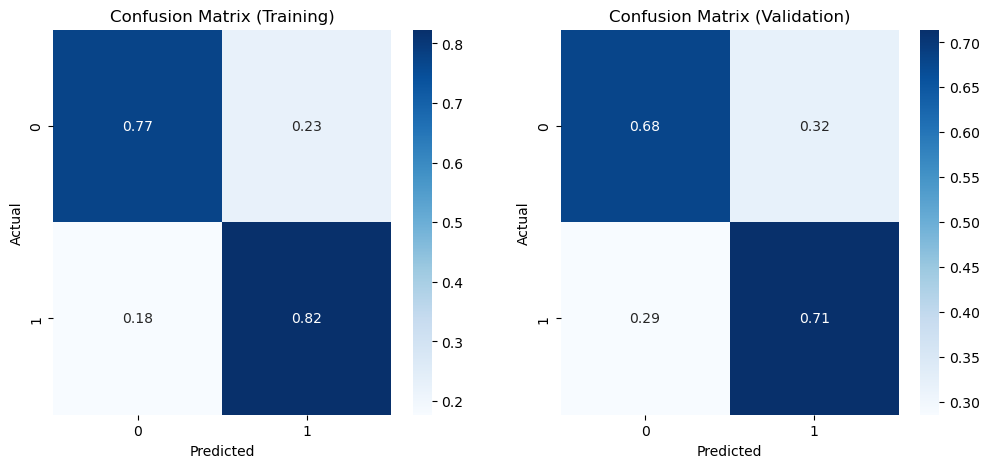

In [100]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.2"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning of KNN </b></span>

In [101]:
# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Adjust the number of neighbors to explore
}

# Create the KNN classifier model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7679748822605965
Validation Accuracy: 0.6993094789704959


,0,1,accuracy,macro avg,weighted avg
precision,0.715380,0.683755,0.699309,0.699568,0.699965
recall,0.686467,0.712814,0.699309,0.699640,0.699309
f1-score,0.700625,0.697982,0.699309,0.699304,0.699337
support,1633.000000,1553.000000,0.699309,3186.000000,3186.000000


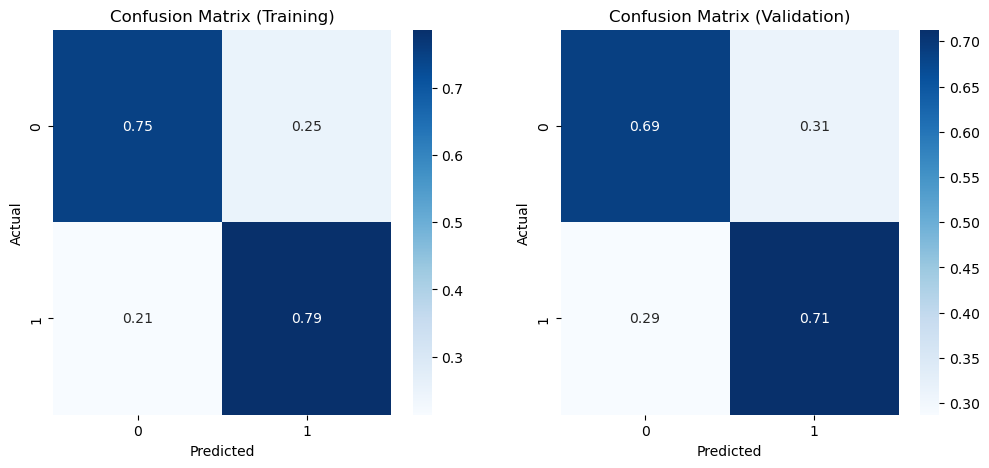

In [102]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.3 | Decision Tree

In [103]:
# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = decision_tree_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = decision_tree_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 1.0
Validation Accuracy: 0.6833019460138104


,0,1,accuracy,macro avg,weighted avg
precision,0.699488,0.667694,0.683302,0.683591,0.683991
recall,0.669933,0.697360,0.683302,0.683646,0.683302
f1-score,0.684392,0.682205,0.683302,0.683298,0.683326
support,1633.000000,1553.000000,0.683302,3186.000000,3186.000000


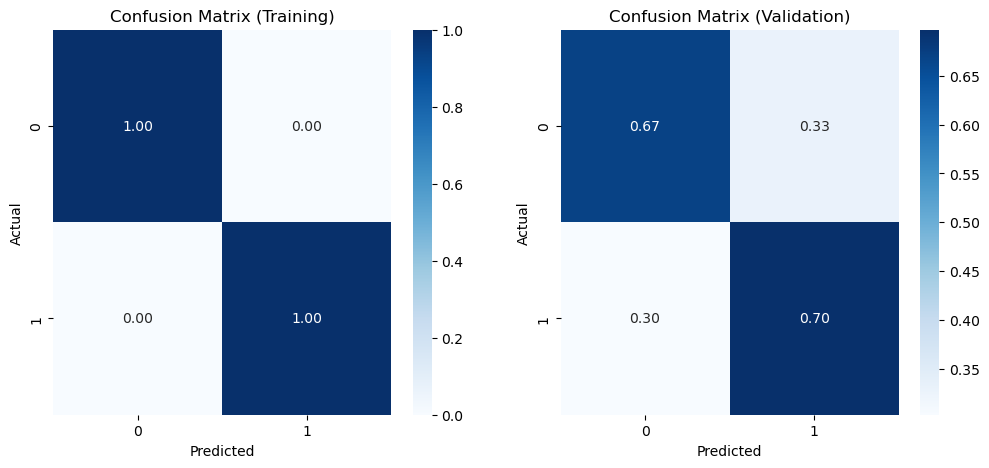

In [104]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning Of Decision Tree </b></span>

In [105]:
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the final model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7266875981161696
Validation Accuracy: 0.7087256748273697


,0,1,accuracy,macro avg,weighted avg
precision,0.718266,0.698918,0.708726,0.708592,0.708835
recall,0.710349,0.707019,0.708726,0.708684,0.708726
f1-score,0.714286,0.702945,0.708726,0.708615,0.708758
support,1633.000000,1553.000000,0.708726,3186.000000,3186.000000


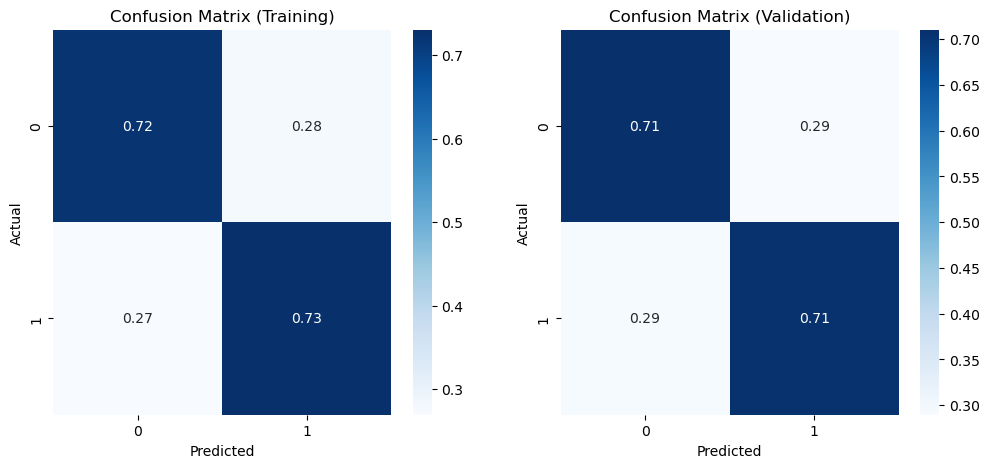

In [106]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.4 | Random Forest

In [107]:
# Create the Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = random_forest_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = random_forest_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 1.0
Validation Accuracy: 0.72661644695543


,0,1,accuracy,macro avg,weighted avg
precision,0.739021,0.714196,0.726616,0.726609,0.726920
recall,0.721372,0.732131,0.726616,0.726752,0.726616
f1-score,0.730090,0.723052,0.726616,0.726571,0.726660
support,1633.000000,1553.000000,0.726616,3186.000000,3186.000000


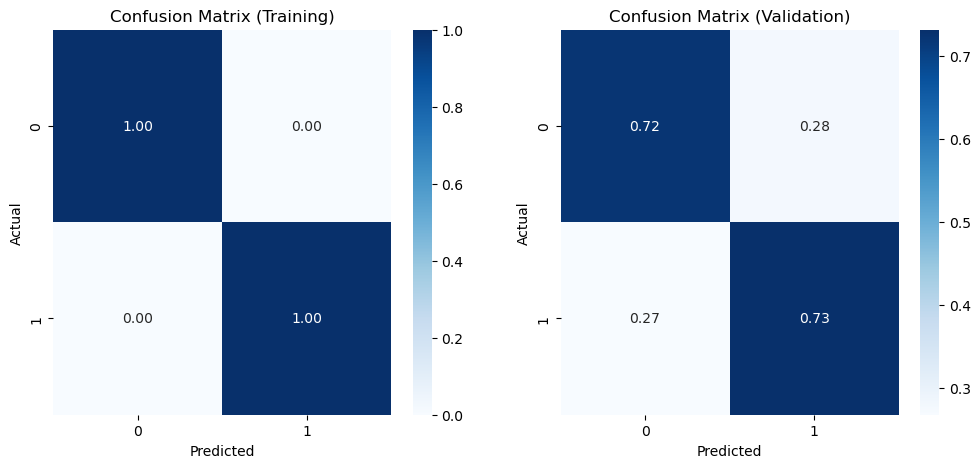

In [108]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.4"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of Random Forest </b></span>

In [109]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

# Create the Random Forest model
random_forest_model = RandomForestClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.8596546310832025
Validation Accuracy: 0.729127432517263


,0,1,accuracy,macro avg,weighted avg
precision,0.738243,0.719745,0.729127,0.728994,0.729226
recall,0.730557,0.727624,0.729127,0.729091,0.729127
f1-score,0.734380,0.723663,0.729127,0.729021,0.729156
support,1633.000000,1553.000000,0.729127,3186.000000,3186.000000


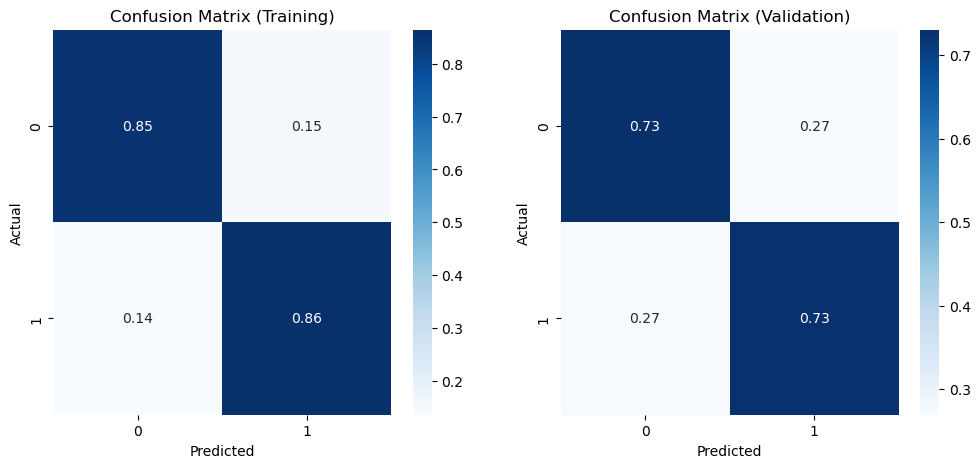

In [110]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.5 | Support Vector Classifier

In [111]:
# Create the SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = svm_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7277864992150707
Validation Accuracy: 0.7187696170747018


,0,1,accuracy,macro avg,weighted avg
precision,0.719476,0.717983,0.71877,0.718729,0.718748
recall,0.739743,0.696716,0.71877,0.718229,0.718770
f1-score,0.729469,0.707190,0.71877,0.718329,0.718609
support,1633.000000,1553.000000,0.71877,3186.000000,3186.000000


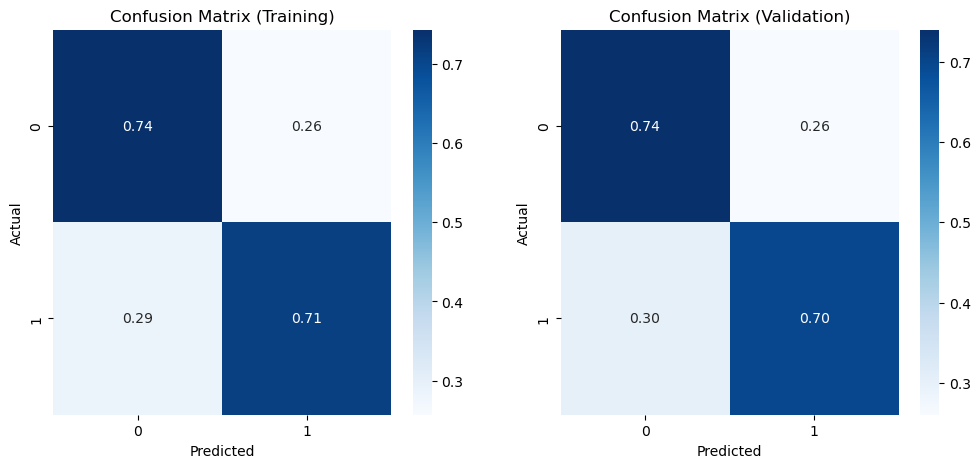

In [112]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of SVC</b></span>

In [113]:
# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
              }

# Create the SVM model
svm_model = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', refit = True, verbose = 3)
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Accuracy: 0.728021978021978
Validation Accuracy: 0.7197112366603892


,0,1,accuracy,macro avg,weighted avg
precision,0.719194,0.720294,0.719711,0.719744,0.719730
recall,0.743417,0.694784,0.719711,0.719101,0.719711
f1-score,0.731105,0.707309,0.719711,0.719207,0.719506
support,1633.000000,1553.000000,0.719711,3186.000000,3186.000000


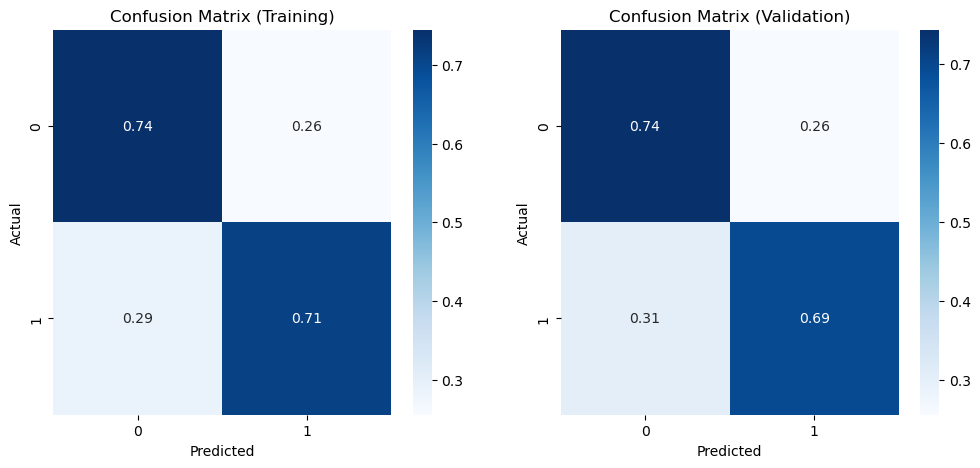

In [114]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.6 | AdaBoost Classifier

In [115]:
# Create the AdaBoost classifier model
adaboost_model = AdaBoostClassifier()

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = adaboost_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = adaboost_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7245682888540032
Validation Accuracy: 0.7197112366603892


,0,1,accuracy,macro avg,weighted avg
precision,0.725885,0.713178,0.719711,0.719532,0.719691
recall,0.728108,0.710882,0.719711,0.719495,0.719711
f1-score,0.726995,0.712028,0.719711,0.719512,0.719699
support,1633.000000,1553.000000,0.719711,3186.000000,3186.000000


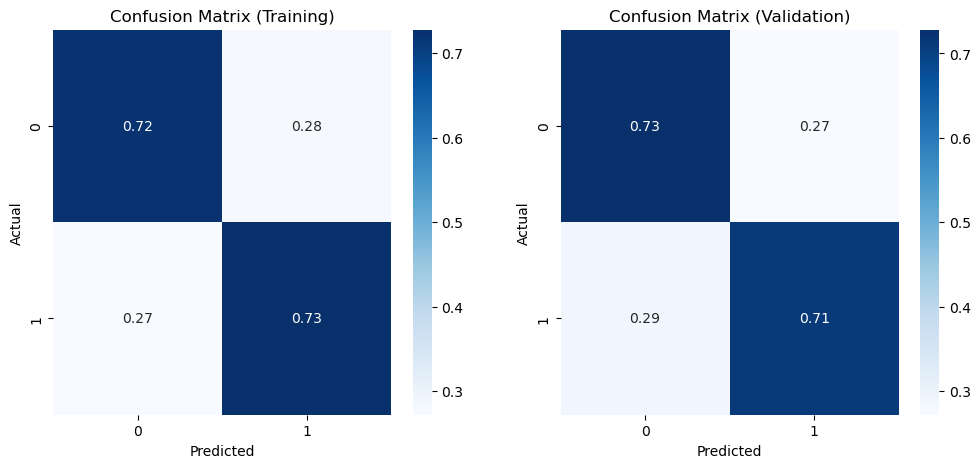

In [116]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of AdaBoost</b></span>

In [117]:
# Define the hyperparameter grid to search
param_grid = {'n_estimators': [100, 200, 300]}

# Create the AdaBoost classifier model
adaboost_model = AdaBoostClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7303767660910518
Validation Accuracy: 0.7256748273697426


,0,1,accuracy,macro avg,weighted avg
precision,0.727928,0.723208,0.725675,0.725568,0.725627
recall,0.742192,0.708307,0.725675,0.725249,0.725675
f1-score,0.734991,0.715680,0.725675,0.725335,0.725578
support,1633.000000,1553.000000,0.725675,3186.000000,3186.000000


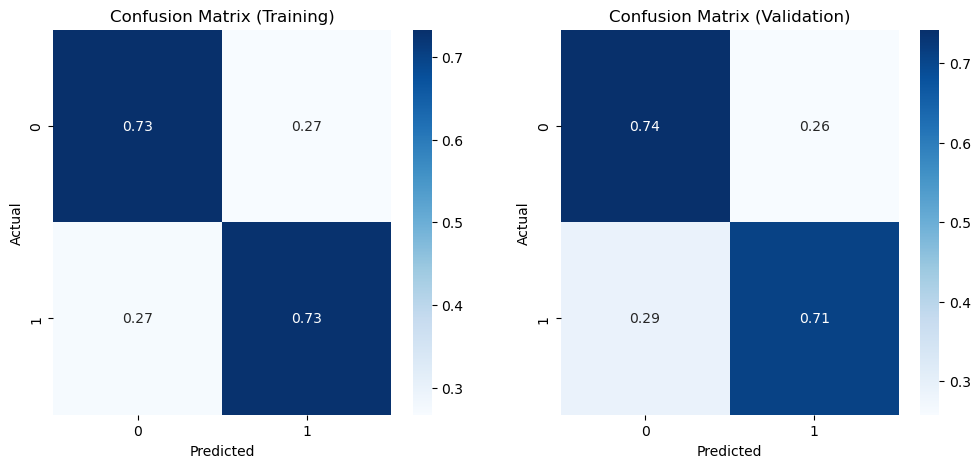

In [118]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.7 | Gradient Boosting Classifier

In [119]:
# Create the Gradient Boosting classifier model
gbm_model = GradientBoostingClassifier()

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = gbm_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = gbm_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.736734693877551
Validation Accuracy: 0.7162586315128688


,0,1,accuracy,macro avg,weighted avg
precision,0.722121,0.710032,0.716259,0.716077,0.716228
recall,0.725658,0.706375,0.716259,0.716017,0.716259
f1-score,0.723885,0.708199,0.716259,0.716042,0.716239
support,1633.000000,1553.000000,0.716259,3186.000000,3186.000000


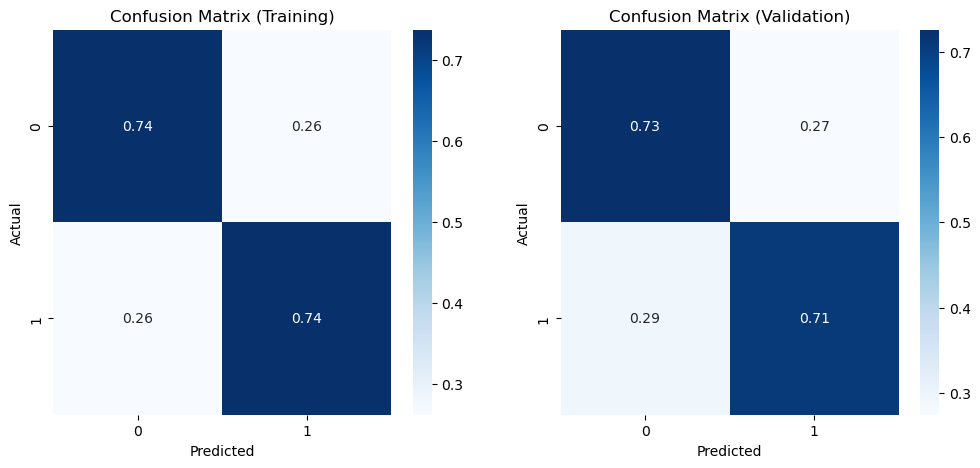

In [120]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of Gradient Boosting</b></span>

In [121]:
# Define the hyperparameter grid to search
param_grid = {
    "n_estimators":[50, 100, 200],
    "max_depth":[3, 5, 7],
    "learning_rate":[0.01, 0.1, 1]
}

# Create the Gradient Boosting classifier model
gbm_model = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gbm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.7964678178963893
Validation Accuracy: 0.7259887005649718


,0,1,accuracy,macro avg,weighted avg
precision,0.735732,0.716010,0.725989,0.725871,0.726119
recall,0.726271,0.725692,0.725989,0.725981,0.725989
f1-score,0.730971,0.720819,0.725989,0.725895,0.726022
support,1633.000000,1553.000000,0.725989,3186.000000,3186.000000


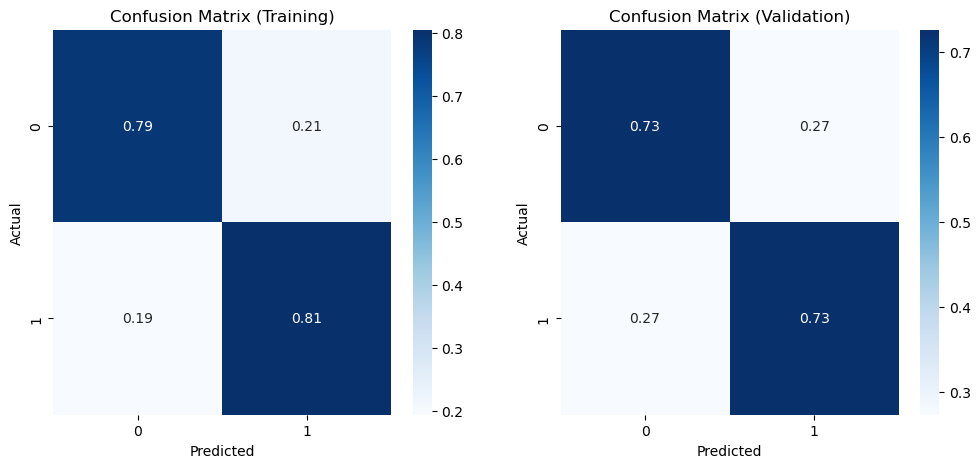

In [122]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.8 | XGBoost Classifier

In [123]:
# Create the XGBoost classifier model
xgboost_model = XGBClassifier()

# Fit the model to the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = xgboost_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = xgboost_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.8307692307692308
Validation Accuracy: 0.7281858129315757


,0,1,accuracy,macro avg,weighted avg
precision,0.738941,0.717268,0.728186,0.728104,0.728376
recall,0.726271,0.730200,0.728186,0.728235,0.728186
f1-score,0.732551,0.723676,0.728186,0.728113,0.728225
support,1633.000000,1553.000000,0.728186,3186.000000,3186.000000


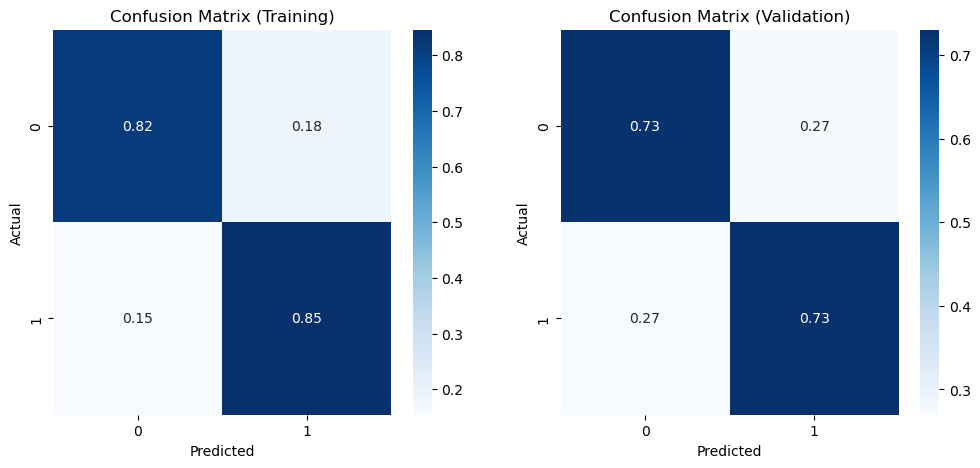

In [124]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of XGBoost</b></span>

In [125]:
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Create the XGBoost classifier model
xgboost_model = XGBClassifier(objective='binary:logistic', eval_metric = 'logloss', base_score = 0.5)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

Training Accuracy: 0.795447409733124
Validation Accuracy: 0.72661644695543


,0,1,accuracy,macro avg,weighted avg
precision,0.736646,0.716371,0.726616,0.726508,0.726763
recall,0.726271,0.726980,0.726616,0.726625,0.726616
f1-score,0.731422,0.721636,0.726616,0.726529,0.726652
support,1633.000000,1553.000000,0.726616,3186.000000,3186.000000


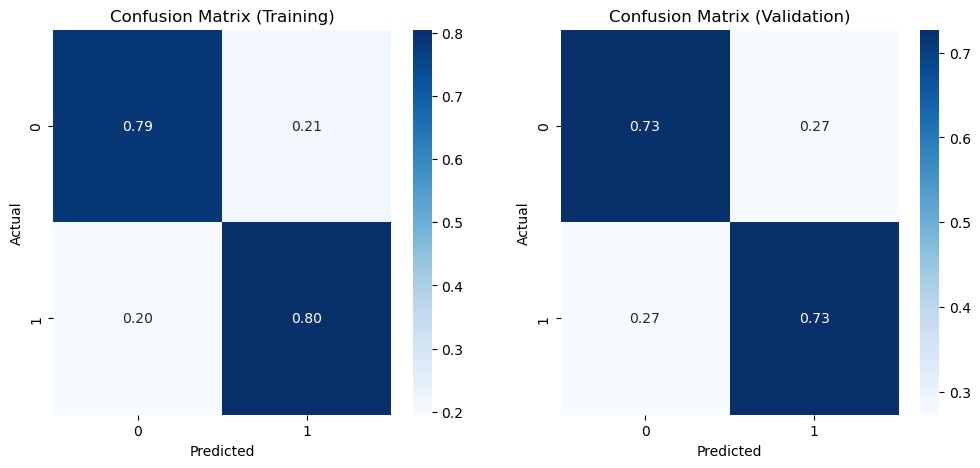

In [126]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.9 | LightGBM Classifier

In [127]:
# Create the Light Gradient Boosting classifier model
lgbm_model = LGBMClassifier()

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = lgbm_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = lgbm_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report

[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
Training Accuracy: 0.7760596546310832
Validation Accuracy: 0.7272441933458883


,0,1,accuracy,macro avg,weighted avg
precision,0.736094,0.718112,0.727244,0.727103,0.727329
recall,0.729333,0.725048,0.727244,0.727190,0.727244
f1-score,0.732698,0.721564,0.727244,0.727131,0.727270
support,1633.000000,1553.000000,0.727244,3186.000000,3186.000000


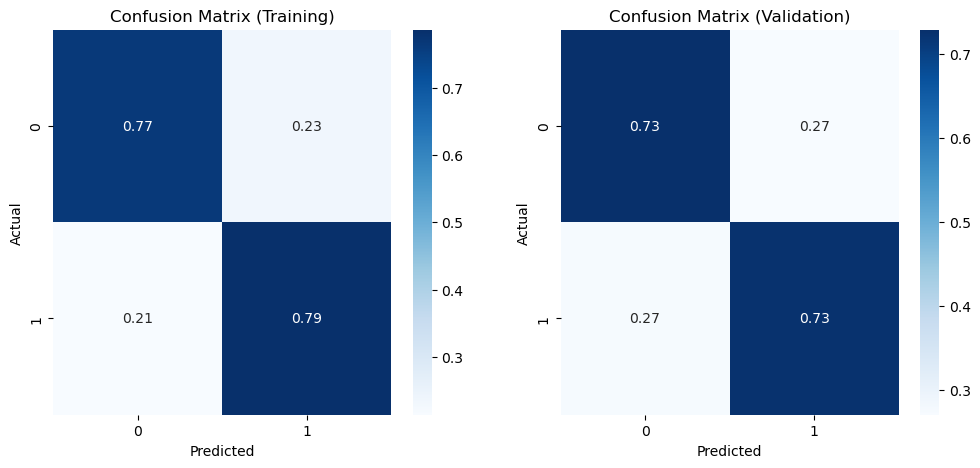

In [128]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.9"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of LightGBM</b></span>

In [129]:
# Define the hyperparameter grid to search
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Create the Light Gradient Boosting classifier model
lgbm_model = LGBMClassifier(objective='binary', boosting_type='gbdt', force_col_wise='true')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lgbm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)
final_model = best_model

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)
class_report = classification_report(y_test, y_test_pred, digits=2, output_dict=True)
class_report = pd.DataFrame(class_report)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
class_report



[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
Training Accuracy: 0.7595761381475667
Validation Accuracy: 0.7269303201506592


,0,1,accuracy,macro avg,weighted avg
precision,0.736809,0.716825,0.72693,0.726817,0.727068
recall,0.726883,0.726980,0.72693,0.726932,0.726930
f1-score,0.731813,0.721867,0.72693,0.726840,0.726965
support,1633.000000,1553.000000,0.72693,3186.000000,3186.000000


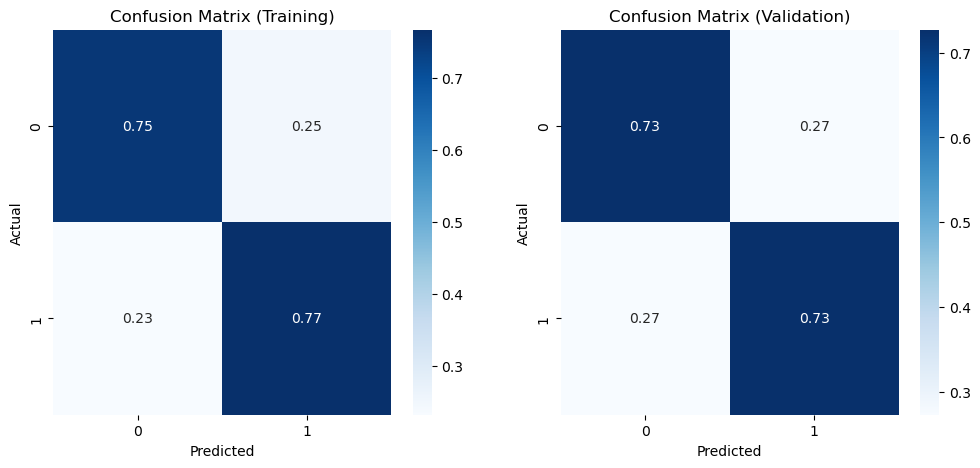

In [130]:
# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

# 4. Model Deployment

PIC : Kemas

In [131]:
import pickle
final_model

# Open a file for writing in binary mode
with open("final_model.pkl", "wb") as f:
    # Pickle the random value to the file
    pickle.dump(final_model, f)

## 4.1 Streamlit App

In [132]:
# import streamlit as st
# import streamlit.components.v1 as stc
# import pickle
# import pandas as pd
# import numpy as np

# with open('model/Random_Forest_model.pkl','rb') as file:
#     Random_Forest_Model = pickle.load(file)

# def main():
#     # stc.html(html_temp)
#     st.title("Customer Churn Prediction App")
#     st.caption("This app is created by Algowizard Team for Final Project of Data Science Bootcamp")

#     menu = ["Home","Machine Learning"]
#     choice = st.sidebar.selectbox("Menu", menu)

#     if choice == "Home":
#         st.header("Home")
#         st.caption("Aplikasi prediksi churn memanfaatkan pembelajaran mesin dan kecerdasan buatan untuk menganalisis data pelanggan dan mengidentifikasi mereka yang berisiko pergi. Hal ini memungkinkan bisnis untuk secara proaktif melibatkan pelanggan ini dengan intervensi yang ditargetkan dan strategi retensi, meminimalkan churn dan meningkatkan nilai umur pelanggan.")

#         st.markdown("""
#             <p style="font-size: 16px; font-weight: bold">Sekilas tentang Dataset yang digunakan</p>
#             """, unsafe_allow_html=True)

#         df = pd.DataFrame(np.random.randn(10, 5), columns=("col %d" % i for i in range(5)))
#         st.table(df)


#     elif choice == "Machine Learning":
#         st.header("Prediction Model")
#         run_ml_app()

#     col1, col2, col3 = st.columns([1, 10, 1])  # Center column takes up most of the width
#     with col2:
#         images = ["1. Ola.png", "2. July.png", "3. Faza.png","4. Timmy.png",
#               "5. Kemas.png", "6. Eko.png", "7. Osha.png"]
#         st.image(images, width=80)  # Set width for each image

# def run_ml_app():
#     # design = """<div style='padding:15px;">
#     #                 <h1 style='color:#fff'>Loan Eligibility Prediction</h1>
#     #             </div>"""
#     # st.markdown(design, unsafe_allow_html=True)

#     st.markdown("""
#     <p style="font-size: 16px; font-weight: bold">Insert Data</p>
#     """, unsafe_allow_html=True)

#     left, right = st.columns((2,2))
#     gender = left.selectbox('Gender',
#                             ('Male', 'Female'))
#     age = left.number_input('Age', 1, 100)
#     credit_score = left.number_input('Credit Score',0,1000)
#     estimated_salary = right.number_input('Estimated Salary',0.0,100000000.00)
#     has_credit_card = right.selectbox('Credit Card',('Yes','No'))

#     # married = right.selectbox('Married', ('Yes','No'))
#     # dependent = left.selectbox('Dependents', ('None', 'One', 'Two', 'Three'))
#     # education = right.selectbox('Education', ('Graduate', 'Non-Graduate'))
#     # self_employed = left.selectbox('Self-Employed', ('Yes', 'No'))
#     # applicant_income = right.number_input('Applicant Income')
#     # coApplicant_income = left.number_input(
#     #     'Co - Applicant Income')
#     # loan_amount = right.number_input('Loan Amount')
#     # loan_amount_term = left.number_input('Loan Tenor (In Months)')
#     # credit_history = right.number_input('Credit History', 0.0, 1.0)
#     # property_area = st.selectbox('Property Area', ('Semiurban','Urban', 'Rural'))
#     button = st.button('Predict')

#     #if button is clicked (ketika button dipencet)
#     if button:
#         #make prediction
#         result = predict(gender,age,credit_score,estimated_salary,has_credit_card)
#         if result == 'Eligible':
#             st.success(f'You are {result} for the loan')
#         else:
#             st.warning(f'You are {result} for the loan')


# def predict(gender,age,credit_score,estimated_salary,has_credit_card):
#     #processing user input
#     gen = 0 if gender == 'Male' else 1
#     cre = 0 if has_credit_card == 'No' else 1
#     # mar = 0 if married == 'Yes' else 1
#     # dep = float(0 if dependent == 'None' else 1 if dependent == 'One' else 2 if dependent == 'Two' else 3)
#     # edu = 0 if education == 'Graduate' else 1
#     # sem = 0 if self_employed == 'Yes' else 1
#     # pro = 0 if property_area == 'Semiurban' else 1 if property_area == 'Urban' else 2
#     # lam = loan_amount/1000
#     # cap = coApplicant_income / 1000

#     #Making prediction
#     prediction = Random_Forest_Model.predict([[gen, cre, age, credit_score,
#                                                estimated_salary]])
#     result = 'Stayed' if prediction == 0 else 'Exited'

#     return result

# if __name__ == "__main__":
#     main()